In [1]:
import pybaseball as pyball
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Get all NL Central Team Records for 2018
year = 2018
brewers = pyball.schedule_and_record(year, 'MIL')
cardinals = pyball.schedule_and_record(year, 'STL')
cubs = pyball.schedule_and_record(year, 'CHC')
pirates = pyball.schedule_and_record(year, 'PIT')
reds = pyball.schedule_and_record(year, 'CIN')

In [3]:
brewers.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,163.000000,163.000000,163.000000,163.000000,162.000000,163.000000
mean,4.625767,4.042945,9.177914,1.693252,32098.228395,0.607362
std,3.271814,3.083908,0.675134,0.687914,9368.160019,2.422721
min,0.000000,0.000000,9.000000,1.000000,5265.000000,-7.000000
25%,2.000000,2.000000,9.000000,1.000000,27156.250000,-1.000000
50%,4.000000,3.000000,9.000000,2.000000,34666.500000,1.000000
75%,7.000000,6.000000,9.000000,2.000000,39432.000000,2.000000
max,17.000000,21.000000,15.000000,4.000000,46040.000000,8.000000


In [4]:
cubs.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,163.000000,163.000000,163.000000,163.000000,162.000000,163.000000
mean,4.668712,3.957055,9.257669,1.901840,35834.290123,0.552147
std,3.574697,3.004831,0.959610,1.055349,8207.139905,2.152097
min,0.000000,0.000000,9.000000,1.000000,10428.000000,-5.000000
25%,2.000000,2.000000,9.000000,1.000000,32941.750000,-1.000000
50%,4.000000,4.000000,9.000000,2.000000,38460.500000,1.000000
75%,7.000000,6.000000,9.000000,2.000000,40887.750000,2.000000
max,16.000000,18.000000,17.000000,4.000000,53904.000000,7.000000


In [5]:
cardinals.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.685185,4.265432,9.179012,2.820988,35646.950617,0.339506
std,3.111733,2.925139,0.677081,0.763323,10010.423048,2.195884
min,0.000000,0.000000,9.000000,1.000000,7230.000000,-4.000000
25%,3.000000,2.000000,9.000000,3.000000,27865.750000,-1.000000
50%,4.000000,4.000000,9.000000,3.000000,39358.500000,1.000000
75%,6.000000,6.000000,9.000000,3.000000,43495.750000,2.000000
max,18.000000,17.000000,14.000000,5.000000,48247.000000,8.000000


In [6]:
pirates.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,161.000000,161.000000,161.000000,161.000000,159.000000,161.000000
mean,4.298137,4.304348,9.161491,3.242236,25155.056604,0.254658
std,3.043117,3.480380,0.797658,1.122366,10387.115817,2.835665
min,0.000000,0.000000,6.000000,1.000000,6852.000000,-5.000000
25%,2.000000,2.000000,9.000000,3.000000,17820.500000,-2.000000
50%,4.000000,4.000000,9.000000,4.000000,23244.000000,1.000000
75%,6.000000,6.000000,9.000000,4.000000,33158.500000,2.000000
max,14.000000,17.000000,15.000000,4.000000,53139.000000,11.000000


In [7]:
reds.describe()

,R,RA,Inn,Rank,Attendance,Streak
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,4.296296,5.055556,9.203704,4.987654,25017.240741,-0.549383
std,3.007008,3.272794,0.697279,0.110766,10435.382685,2.494846
min,0.000000,0.000000,7.000000,4.000000,8855.000000,-8.000000
25%,2.000000,3.000000,9.000000,5.000000,17615.750000,-2.000000
50%,4.000000,5.000000,9.000000,5.000000,22749.000000,-1.000000
75%,6.000000,7.000000,9.000000,5.000000,31618.750000,1.000000
max,15.000000,19.000000,13.000000,5.000000,49911.000000,7.000000


In [8]:
# Gets wins-to-date, losses-to-date, and win_percent-to-date for each team
brewers['Wins'] = np.where(brewers['W/L']=='W', 1, (np.where(brewers['W/L']=='W-wo', 1, 0))).cumsum()
brewers['Losses'] = np.where(brewers['W/L']=='L', 1, (np.where(brewers['W/L']=='L-wo', 1, 0))).cumsum()
brewers['Win_Percentage'] = brewers['Wins'] / (brewers['Wins'] + brewers['Losses'])

cubs['Wins'] = np.where(cubs['W/L']=='W', 1, (np.where(cubs['W/L']=='W-wo', 1, 0))).cumsum()
cubs['Losses'] = np.where(cubs['W/L']=='L', 1, (np.where(cubs['W/L']=='L-wo', 1, 0))).cumsum()
cubs['Win_Percentage'] = cubs['Wins'] / (cubs['Wins'] + cubs['Losses'])

cardinals['Wins'] = np.where(cardinals['W/L']=='W', 1, (np.where(cardinals['W/L']=='W-wo', 1, 0))).cumsum()
cardinals['Losses'] = np.where(cardinals['W/L']=='L', 1, (np.where(cardinals['W/L']=='L-wo', 1, 0))).cumsum()
cardinals['Win_Percentage'] = cardinals['Wins'] / (cardinals['Wins'] + cardinals['Losses'])

pirates['Wins'] = np.where(pirates['W/L']=='W', 1, (np.where(pirates['W/L']=='W-wo', 1, 0))).cumsum()
pirates['Losses'] = np.where(pirates['W/L']=='L', 1, (np.where(pirates['W/L']=='L-wo', 1, 0))).cumsum()
pirates['Win_Percentage'] = pirates['Wins'] / (pirates['Wins'] + pirates['Losses'])

reds['Wins'] = np.where(reds['W/L']=='W', 1, (np.where(reds['W/L']=='W-wo', 1, 0))).cumsum()
reds['Losses'] = np.where(reds['W/L']=='L', 1, (np.where(reds['W/L']=='L-wo', 1, 0))).cumsum()
reds['Win_Percentage'] = reds['Wins'] / (reds['Wins'] + reds['Losses'])

Text(0.5, 1.0, 'NL Central Wins Comparison (2018)')

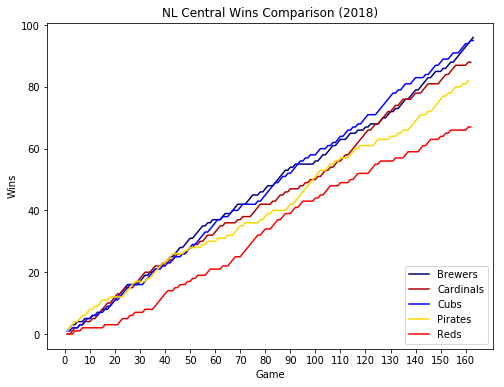

In [9]:
# Graph Wins Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['Wins'], label='Brewers', c='navy')
plt.plot(cardinals['Wins'], label='Cardinals', c='#b30000')
plt.plot(cubs['Wins'], label='Cubs', c='blue')
plt.plot(pirates['Wins'], label='Pirates', c='gold')
plt.plot(reds['Wins'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Wins')

plt.legend(loc='lower right')

plt.title("NL Central Wins Comparison ({})".format(year))

Text(0.5, 1.0, 'NL Central Win Percentage Comparison (2018)')

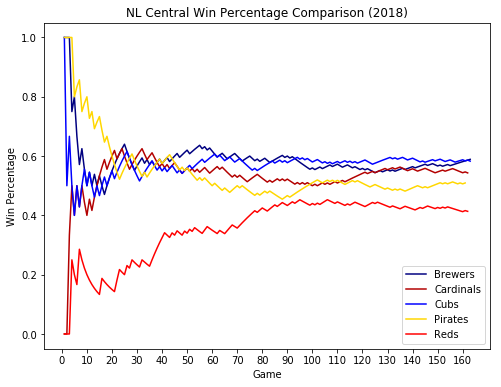

In [10]:
# Graph Win Percentage Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['Win_Percentage'], label='Brewers', c='navy')
plt.plot(cardinals['Win_Percentage'], label='Cardinals', c='#b30000')
plt.plot(cubs['Win_Percentage'], label='Cubs', c='blue')
plt.plot(pirates['Win_Percentage'], label='Pirates', c='gold')
plt.plot(reds['Win_Percentage'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Win Percentage')

plt.legend(loc='lower right')

plt.title("NL Central Win Percentage Comparison ({})".format(year))

In [11]:
# Insert new column called 'int_GB' that represents GB as either negative (meaning behind) or 0.0 meaning in first or tied for first
def modify_gb(gb):
    if gb == 'Tied':
        gb = 0.0
    elif 'up' in gb:
        gb = 0.0 # float(gb.replace('up ', ''))
    else:
        gb = -float(gb)
    
    return gb
    
brewers['int_GB'] = brewers['GB'].dropna().apply(modify_gb)
cardinals['int_GB'] = cardinals['GB'].dropna().apply(modify_gb)
cubs['int_GB'] = cubs['GB'].dropna().apply(modify_gb)
pirates['int_GB'] = pirates['GB'].dropna().apply(modify_gb)
reds['int_GB'] = reds['GB'].dropna().apply(modify_gb)

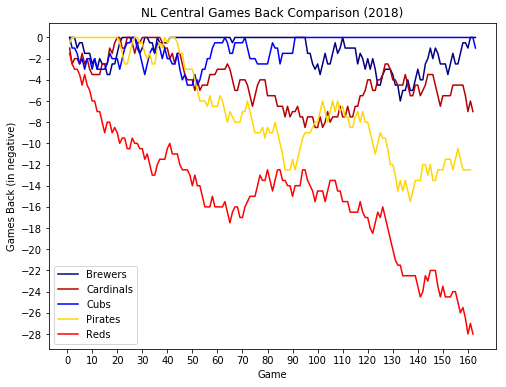

In [12]:
# Graph NL Central Games Back Comparison #
plt.rcParams["figure.figsize"] = (8,6)

plt.plot(brewers['int_GB'], label='Brewers', c='navy')
plt.plot(cardinals['int_GB'], label='Cardinals', c='#b30000')
plt.plot(cubs['int_GB'], label='Cubs', c='blue')
plt.plot(pirates['int_GB'], label='Pirates', c='gold')
plt.plot(reds['int_GB'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.yticks(np.arange(0, -30, step=-2))
plt.xlabel('Game')
plt.ylabel('Games Back (in negative)')

plt.title("NL Central Games Back Comparison ({})".format(year))
plt.legend(loc='lower left')

In [13]:
# Get total runs-to-date and total runs_allowed-to-date for each team
brewers['Total_Runs'] = brewers['R'].cumsum()
brewers['Total_RA'] = brewers['RA'].cumsum()

cubs['Total_Runs'] = cubs['R'].cumsum()
cubs['Total_RA'] = cubs['RA'].cumsum()

cardinals['Total_Runs'] = cardinals['R'].cumsum()
cardinals['Total_RA'] = cardinals['RA'].cumsum()

pirates['Total_Runs'] = pirates['R'].cumsum()
pirates['Total_RA'] = pirates['RA'].cumsum()

reds['Total_Runs'] = reds['R'].cumsum()
reds['Total_RA'] = reds['RA'].cumsum()

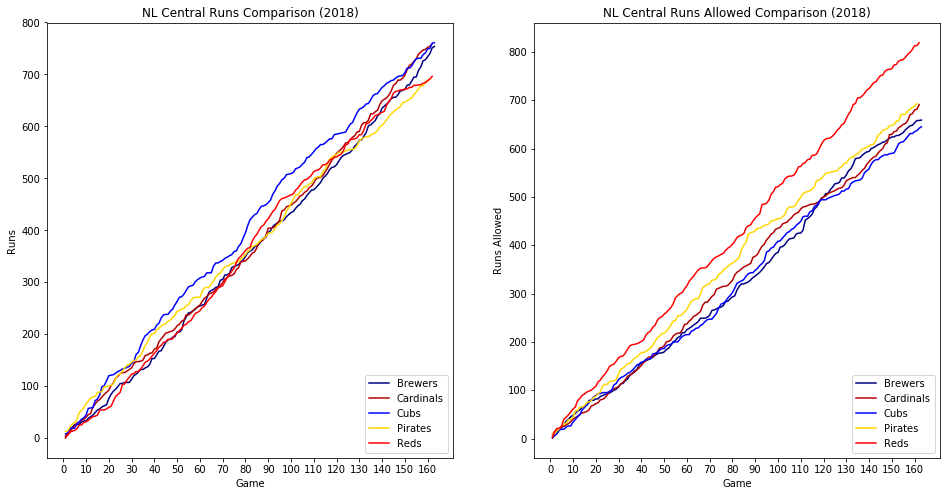

In [14]:
# Graph Runs and Runs Allowed Comparisons #
plt.rcParams["figure.figsize"] = (16,8)

plt.subplot(1,2,1)
plt.plot(brewers['Total_Runs'], label='Brewers', c='navy')
plt.plot(cardinals['Total_Runs'], label='Cardinals', c='#b30000')
plt.plot(cubs['Total_Runs'], label='Cubs', c='blue')
plt.plot(pirates['Total_Runs'], label='Pirates', c='gold')
plt.plot(reds['Total_Runs'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs')

plt.title("NL Central Runs Comparison ({})".format(year))
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(brewers['Total_RA'], label='Brewers', c='navy')
plt.plot(cardinals['Total_RA'], label='Cardinals', c='#b30000')
plt.plot(cubs['Total_RA'], label='Cubs', c='blue')
plt.plot(pirates['Total_RA'], label='Pirates', c='gold')
plt.plot(reds['Total_RA'], label='Reds', c='red')

plt.xticks(np.arange(0, len(brewers.index), step=10))
plt.xlabel('Game')
plt.ylabel('Runs Allowed')

plt.title("NL Central Runs Allowed Comparison ({})".format(year))
plt.legend(loc='lower right')

In [15]:
brewers['Total_Home_Attendance'] = brewers[brewers['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
cubs['Total_Home_Attendance'] = cubs[cubs['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
cardinals['Total_Home_Attendance'] = cardinals[cardinals['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
pirates['Total_Home_Attendance'] = pirates[pirates['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()
reds['Total_Home_Attendance'] = reds[reds['Home_Away'] == 'Home']['Attendance'].dropna().cumsum()

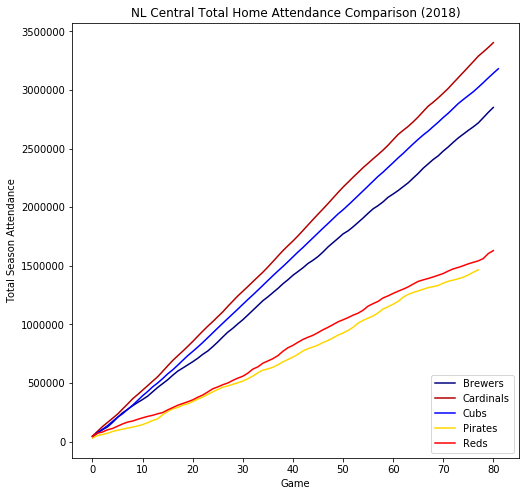

In [16]:
# Graph Total Home Attendance Comparison #
plt.rcParams["figure.figsize"] = (8,8)

# Create new Series for home attendance #
brewers_attendance = brewers['Total_Home_Attendance'].dropna()
brewers_attendance.index = range(len(brewers_attendance))

cardinals_attendance = cardinals['Total_Home_Attendance'].dropna()
cardinals_attendance.index = range(len(cardinals_attendance))

cubs_attendance = cubs['Total_Home_Attendance'].dropna()
cubs_attendance.index = range(len(cubs_attendance))

pirates_attendance = pirates['Total_Home_Attendance'].dropna()
pirates_attendance.index = range(len(pirates_attendance))

reds_attendance = reds['Total_Home_Attendance'].dropna()
reds_attendance.index = range(len(reds_attendance))

plt.plot(brewers_attendance, label='Brewers', c='navy')
plt.plot(cardinals_attendance, label='Cardinals', c='#b30000')
plt.plot(cubs_attendance, label='Cubs', c='blue')
plt.plot(pirates_attendance, label='Pirates', c='gold')
plt.plot(reds_attendance, label='Reds', c='red')

plt.xlabel('Game')
plt.ylabel('Total Season Attendance')

plt.title("NL Central Total Home Attendance Comparison ({})".format(year))
plt.legend(loc='lower right')

In [17]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests

def team_batting_bref(team, start_season, end_season=None):
    """
    Get season-level Batting Statistics for Specific Team (from Baseball-Reference)
    ARGUMENTS:
    team : str : The Team Abbreviation (i.e. 'NYY' for Yankees) of the Team you want data for
    start_season : int : first season you want data for (or the only season if you do not specify an end_season)
    end_season : int : final season you want data for
    """
    if start_season is None:
        raise ValueError("You need to provide at least one season to collect data for. Try team_batting_bref(season) or team_batting_bref(start_season, end_season).")
    if end_season is None:
        end_season = start_season

    url = "https://www.baseball-reference.com/teams/{}".format(team)

    data = []
    headings = None
    for season in range(start_season, end_season+1):
        print("Getting Batting Data: {} {}".format(season, team))
        stats_url = "{}/{}.shtml".format(url, season)
        response = requests.get(stats_url)
        soup = BeautifulSoup(response.content, 'html.parser')

        table = soup.find_all('table', {'class': 'sortable stats_table'})[0]

        if headings is None:
            headings = [row.text.strip() for row in table.find_all('th')[1:28]]

        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [ele.text.strip() for ele in cols]
            cols = [col.replace('*', '').replace('#', '') for col in cols]  # Removes '*' and '#' from some names
            #cols = [col for col in cols if 'Totals' not in col and 'NL teams' not in col and 'AL teams' not in col]  # Removes Team Totals and other rows
            cols.insert(2, season)
            data.append([ele for ele in cols[0:]])

    headings.insert(2, "Year")
    data = pd.DataFrame(data=data, columns=headings) # [:-5]  # -5 to remove Team Totals and other rows
    data = data.dropna()  # Removes Row of All Nones

    return data

In [18]:
team_batting_bref('MIL', 2011)

Getting Batting Data: 2011 MIL


,Pos,Name,Year,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
1,C,Jonathan Lucroy,2011.0,25,136,468,430,45,114,16,...,.313,.391,.703,90,168,7,2,4,3,0
2,1B,Prince Fielder,2011.0,27,162,692,569,95,170,36,...,.415,.566,.981,164,322,17,10,0,6,32
3,2B,Rickie Weeks,2011.0,28,118,515,453,77,122,26,...,.350,.468,.818,121,212,6,8,1,3,3
4,SS,Yuniesky Betancourt,2011.0,29,152,584,556,51,140,27,...,.271,.381,.652,75,212,16,2,0,10,3
5,3B,Casey McGehee,2011.0,28,155,600,546,46,122,24,...,.280,.346,.626,69,189,19,1,0,8,4
6,LF,Ryan Braun,2011.0,27,150,629,563,109,187,38,...,.397,.597,.994,166,336,9,5,0,3,2
7,CF,Nyjer Morgan,2011.0,30,119,429,378,61,115,20,...,.357,.421,.778,111,159,6,14,15,3,0
8,RF,Corey Hart,2011.0,29,130,551,492,80,140,25,...,.356,.510,.866,133,251,12,4,3,1,1
10,CF,Carlos Gomez,2011.0,25,94,258,231,37,52,11,...,.276,.403,.679,82,93,2,2,8,2,0
11,RF,Mark Kotsay,2011.0,35,104,255,233,18,63,13,...,.329,.373,.703,91,87,4,0,0,1,3


In [19]:
# Get all NL Central Team Records for 2011
year = 2011
brewers_bat = team_batting_bref('MIL', year)
cardinals_bat = team_batting_bref('STL', year)
cubs_bat = team_batting_bref('CHC', year)
pirates_bat = team_batting_bref('PIT', year)
reds_bat = team_batting_bref('CIN', year)

Getting Batting Data: 2011 MIL
Getting Batting Data: 2011 STL
Getting Batting Data: 2011 CHC
Getting Batting Data: 2011 PIT
Getting Batting Data: 2011 CIN


In [20]:
def calc_team_def_eff(year, team_bat):
    team_totals = team_bat.loc[team_bat['Name'] == 'Team Totals']
    hits = int(team_totals.iloc[0]['H'])
    homeruns = int(team_totals.iloc[0]['HR'])
    at_bats = int(team_totals.iloc[0]['AB'])
    strikeouts = int(team_totals.iloc[0]['SO'])
    sacrifice_hits = int(team_totals.iloc[0]['SH'])
    sacrifice_flies = int(team_totals.iloc[0]['SF'])
    team_def_eff = 1 - (hits-homeruns)/(at_bats-strikeouts-homeruns+sacrifice_hits+sacrifice_flies)
    return team_def_eff

In [21]:
brewers_def_eff = calc_team_def_eff(year, brewers_bat)
cardinals_def_eff = calc_team_def_eff(year, cardinals_bat)
cubs_def_eff = calc_team_def_eff(year, cubs_bat)
pirates_def_eff = calc_team_def_eff(year, pirates_bat)
reds_bat_eff = calc_team_def_eff(year, reds_bat)

In [22]:
# Get all NL Central Team Records for 2011
year = 2011
brewers = pyball.schedule_and_record(year, 'MIL')
cardinals = pyball.schedule_and_record(year, 'STL')
cubs = pyball.schedule_and_record(year, 'CHC')
pirates = pyball.schedule_and_record(year, 'PIT')
reds = pyball.schedule_and_record(year, 'CIN')

In [23]:
brewers

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
1,"Thursday, Mar 31",MIL,@,CIN,L-wo,6.0,7.0,9.0,0-1,5.0,1.0,Ondrusek,Axford,None,3:09,D,42398.0,-1,None
2,"Saturday, Apr 2",MIL,@,CIN,L,2.0,4.0,9.0,0-2,4.0,2.0,Wood,Marcum,Cordero,2:31,N,37967.0,-2,None
3,"Sunday, Apr 3",MIL,@,CIN,L,3.0,12.0,9.0,0-3,5.0,3.0,Arroyo,Wolf,None,3:06,D,24805.0,-3,None
4,"Monday, Apr 4",MIL,Home,ATL,L,1.0,2.0,9.0,0-4,6.0,3.5,Moylan,Saito,Kimbrel,2:49,D,46017.0,-4,None
5,"Tuesday, Apr 5",MIL,Home,ATL,W,1.0,0.0,9.0,1-4,5.0,3.5,Gallardo,Lowe,None,2:21,N,24117.0,1,None
6,"Wednesday, Apr 6",MIL,Home,ATL,W,5.0,4.0,9.0,2-4,4.0,3.5,Estrada,Minor,Axford,2:36,N,23420.0,2,None
7,"Thursday, Apr 7",MIL,Home,ATL,W,4.0,2.0,9.0,3-4,4.0,2.5,Marcum,Hanson,Axford,2:50,D,24645.0,3,None
8,"Friday, Apr 8",MIL,Home,CHC,L,4.0,7.0,9.0,3-5,4.0,2.5,Zambrano,Wolf,Marmol,2:56,N,34310.0,-1,None
9,"Saturday, Apr 9",MIL,Home,CHC,W,6.0,0.0,9.0,4-5,4.0,2.5,Narveson,Garza,None,2:45,N,42478.0,1,None
10,"Sunday, Apr 10",MIL,Home,CHC,W,6.0,5.0,9.0,5-5,2.0,1.5,Loe,Wood,Axford,2:59,D,37193.0,2,None


In [1010]:
def record_against_opponent(year, team, opponent):
    #team_totals = team_bat.loc[team_bat['Name'] == 'Team Totals']
    #hits = int(team_totals.iloc[0]['H'])
    team_rec = pyball.schedule_and_record(year, team)
    #opp_rec = pyball.schedule_and_record(year, opponent)
    team_v_opp = team_rec.loc[team_rec['Opp'] == opponent]
    if team_v_opp.empty:
        return None
    
    return team_v_opp

In [339]:
brewers_v_cardinals = record_against_opponent(year, 'MIL', 'STL')
brewers_v_cardinals
#brewers_v_cubs = record_against_opponent(year, 'MIL', 'CHC')
#brewers_v_pirates = record_against_opponent(year, 'MIL', 'PIT')
#brewers_v_reds = record_against_opponent(year, 'MIL', 'CIN')

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
32,"Friday, May 6",MIL,@,STL,L,0.0,6.0,9.0,13-19,5.0,5.5,Garcia,Wolf,None,2:02,N,35552.0,-7,None
33,"Saturday, May 7",MIL,@,STL,W,4.0,0.0,9.0,14-19,5.0,4.5,Gallardo,Lohse,None,2:29,D,40229.0,1,None
34,"Sunday, May 8",MIL,@,STL,L,1.0,3.0,9.0,14-20,5.0,5.5,McClellan,Narveson,Salas,2:41,D,40125.0,-1,None
64,"Friday, Jun 10",MIL,Home,STL,W,8.0,0.0,9.0,36-28,2.0,1.5,Narveson,Lohse,None,2:34,N,33240.0,1,None
65,"Saturday, Jun 11",MIL,Home,STL,W,5.0,3.0,9.0,37-28,2.0,0.5,Greinke,Carpenter,Axford,2:26,N,41930.0,2,None
66,"Sunday, Jun 12",MIL,Home,STL,W,4.0,3.0,9.0,38-28,1.0,up 0.5,Marcum,Westbrook,Axford,2:31,D,42692.0,3,None
110,"Monday, Aug 1",MIL,Home,STL,W,6.0,2.0,9.0,61-49,1.0,up 3.5,Greinke,Carpenter,None,2:57,N,41619.0,7,None
111,"Tuesday, Aug 2",MIL,Home,STL,L,7.0,8.0,11.0,61-50,1.0,up 2.5,McClellan,Estrada,Dotel,4:28,N,39393.0,-1,None
112,"Wednesday, Aug 3",MIL,Home,STL,W,10.0,5.0,9.0,62-50,1.0,up 3.5,Wolf,Jackson,None,3:01,D,41906.0,1,None
116,"Tuesday, Aug 9",MIL,@,STL,W,5.0,3.0,10.0,66-50,1.0,up 4.0,Hawkins,Dotel,Axford,3:53,N,40626.0,5,None


In [350]:
#def_eff_v_opp(brewers_v_reds, 'MIL', 'CIN', 2011)

In [1313]:
from datetime import datetime
import urllib
import re

def def_eff_v_opp(record, team, opponent, year):
    away_rec = record[record['Home_Away'] == '@']
    #print('this is the away record:',away_rec)
    if not away_rec.empty:
        months_away = []
        days_away = []

        away_at_bats = []
        away_hits = []
        away_homeruns = []
        away_strikeouts = []
        away_sacrifice_hits = []
        away_sacrifice_flies = []

        home_at_bats = []
        home_hits = []
        home_homeruns = []
        home_strikeouts = []
        home_sacrifice_hits = []
        home_sacrifice_flies = []

        ############### PLAYING IN AWAY STADIUM (OPPONENT'S STADIUM) ###############

        for i in range(len(away_rec)):
            if(away_rec.iloc[i]['Date'][-3] == '('):
                print(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:])
            elif(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:][0] == ' '):
                months_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-5:], '%b %d').month))
                days_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-5:], '%b %d').day))
            else:
                months_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:], '%b %d').month))
                days_away.append(str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:], '%b %d').day))

        dates_away = [str(year)+months_away[i]+days_away[i]+'0' for i in range(len(months_away))]

        for i in range(len(dates_away)):
            try:
                url = "https://www.baseball-reference.com/boxes/{}/{}.shtml".format(opponent, opponent+dates_away[i])
                print(url)
                response = urllib.request.urlopen(url)
            except:
                url = "https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml"
                print(url)
                response = urllib.request.urlopen(url)
            with response as r:
                html = r.read().decode('utf-8')

                start = int(html.find('Team Totals'))
                stop = start+1200
                html_first_totals = html[start:stop]
                html_before_first_totals = html[:start]

                html_2 = html[stop:]

                start_2 = int(html_2.find('Team Totals'))
                stop_2 = start_2+1200
                html_second_totals = html_2[start_2:stop_2]
                html_before_second_totals = html[stop:stop+start_2]

                ############### FIRST TEAM (AWAY) ###############
                AB_away = int(re.search('data-stat="AB" >(.*)</td><td class="right " data-stat="R"', html_first_totals).group(1))
                #R = re.search('data-stat="R" >(.*)</td><td class="right " data-stat="H"', html_first_totals)
                H_away = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_first_totals).group(1))
                #RBI = re.search('data-stat="RBI" >(.*)</td><td class="right " data-stat="BB"', html_first_totals)
                #BB = re.search('data-stat="BB" >(.*)</td><td class="right " data-stat="SO"', html_first_totals)
                SO_away = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_first_totals).group(1))
                #PA = re.search('data-stat="PA" >(.*)</td><td class="right " data-stat="batting_avg"', html_first_totals)
                #batting_avg = re.search('data-stat="batting_avg" >(.*)</td><td class="right " data-stat="onbase_perc"', html_first_totals)
                #onbase_perc = re.search('data-stat="onbase_perc" >(.*)</td><td class="right " data-stat="slugging_perc"', s)
                #slugging_perc = re.search('data-stat="slugging_perc" >(.*)</td><td class="right " data-stat="onbase_plus_slugging"', html_first_totals)
                #onbase_plus_slugging = re.search('data-stat="onbase_plus_slugging" >(.*)</td><td class="right " data-stat="pitches"', html_first_totals)
                #pitches = re.search('data-stat="pitches" >(.*)</td><td class="right " data-stat="strikes_total"', html_first_totals)
                #strikes_total = re.search('data-stat="strikes_total" >(.*)</td><td class="right " data-stat="wpa_bat"', html_first_totals)
                #wpa_bat = re.search('data-stat="wpa_bat" >(.*)</td><td class="right " data-stat="leverage_index_avg', html_first_totals)
                #leverage_index_avg = re.search('data-stat="leverage_index_avg" >(.*)</td><td class="right " data-stat="wpa_bat_pos"', html_first_totals)
                #wpa_bat_pos = re.search('data-stat="wpa_bat_pos" >(.*)</td><td class="right " data-stat="wpa_bat_neg"', html_first_totals)
                #wpa_bat_neg = re.search('data-stat="wpa_bat_neg" >(.*)</td><td class="right " data-stat="re24_bat"', html_first_totals)
                #re24_bat = re.search('data-stat="re24_bat" >(.*)</td><td class="right " data-stat="PO"', html_first_totals)
                #PO = re.search('data-stat="PO" >(.*)</td><td class="right " data-stat="A"', html_first_totals)
                #A = re.search('data-stat="A" >(.*)</td><td class="right " data-stat="details"', html_first_totals)
                #details = re.search('data-stat="details" >(.*)</td><td class="right " data-stat="details"', html_first_totals) ######need this for homeruns, sacrifice hits and sacrifice flies
                homeruns_away = html_before_first_totals.count('data-stat="details" >HR')
                multi_homeruns_away = re.findall('(\d)(?=&#183;HR)', html_before_first_totals)
                if len(multi_homeruns_away)>0:
                    for m_hr in multi_homeruns_away:
                        homeruns_away = homeruns_away + int(m_hr)
                sacrifice_hits_away = html_before_first_totals.count('data-stat="details" >SH')
                multi_sh_away = re.findall('(\d)(?=&#183;SH)', html_before_first_totals)
                if len(multi_sh_away)>0:
                    for m_sh in multi_sh_away:
                        sacrifice_hits_away = sacrifice_hits_away + int(m_sh)
                sacrifice_flies_away = html_before_first_totals.count('data-stat="details" >SF')
                multi_sf_away = re.findall('(\d)(?=&#183;SF)', html_before_first_totals)
                if len(multi_sf_away)>0:
                    for m_sf in multi_sf_away:
                        sacrifice_flies_away = sacrifice_flies_away + int(m_sf)

                away_at_bats.append(AB_away)
                away_hits.append(H_away)
                away_homeruns.append(homeruns_away)
                away_strikeouts.append(SO_away)
                away_sacrifice_hits.append(sacrifice_hits_away)
                away_sacrifice_flies.append(sacrifice_flies_away)

                ############### SECOND TEAM (HOME) ###############
                AB_home = int(re.search('data-stat="AB" >(.*)</td><td class="right " data-stat="R"', html_second_totals).group(1))
                H_home = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_second_totals).group(1))
                SO_home = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_second_totals).group(1))
                homeruns_home = html_before_second_totals.count('data-stat="details" >HR')
                multi_homeruns_home = re.findall('(\d)(?=&#183;HR)', html_before_second_totals)
                if len(multi_homeruns_home)>0:
                    for m_hr in multi_homeruns_home:
                        homeruns_home = homeruns_home + int(m_hr)
                sacrifice_hits_home = html_before_second_totals.count('data-stat="details" >SH')
                multi_sh_home = re.findall('(\d)(?=&#183;SH)', html_before_second_totals)
                if len(multi_sh_home)>0:
                    for m_sh in multi_sh_home:
                        sacrifice_hits_home = sacrifice_hits_home + int(m_sh)
                sacrifice_flies_home = html_before_second_totals.count('data-stat="details" >SF')
                multi_sf_home = re.findall('(\d)(?=&#183;SF)', html_before_second_totals)
                if len(multi_sf_home)>0:
                    for m_sf in multi_sf_home:
                        sacrifice_flies_home = sacrifice_flies_home + int(m_sf)

                home_at_bats.append(AB_home)
                home_hits.append(H_home)
                home_homeruns.append(homeruns_home)
                home_strikeouts.append(SO_home)
                home_sacrifice_hits.append(sacrifice_hits_home)
                home_sacrifice_flies.append(sacrifice_flies_home)

        #print(away_hits)
        #print(away_homeruns)
        #print(away_at_bats)
        #print(away_strikeouts)
        #print(away_sacrifice_flies)
        #print(away_sacrifice_hits)
        def_eff_away_at_away = 1 - (sum(away_hits)-sum(away_homeruns))/(sum(away_at_bats)-sum(away_strikeouts)-sum(away_homeruns)+sum(away_sacrifice_flies)+sum(away_sacrifice_hits))
        def_eff_home_at_away = 1 - (sum(home_hits)-sum(home_homeruns))/(sum(home_at_bats)-sum(home_strikeouts)-sum(home_homeruns)+sum(home_sacrifice_flies)+sum(home_sacrifice_hits))
        print(team,'defense efficiency against',opponent,'when playing away (home stadium:',opponent,'):',def_eff_away_at_away)
        print(opponent,'defense efficiency against',team,'when playing home (home stadium:',opponent,'):',def_eff_home_at_away)
    
    
    
    
    ############### PLAYING IN HOME STADIUM ###############
    home_rec = record[record['Home_Away'] == 'Home']
    #print('this is the home record:', home_rec)
    if not home_rec.empty:
        months_home = []
        days_home = []

        months_away = []
        days_away = []
        away_at_bats = []
        away_hits = []
        away_homeruns = []
        away_strikeouts = []
        away_sacrifice_hits = []
        away_sacrifice_flies = []

        home_at_bats = []
        home_hits = []
        home_homeruns = []
        home_strikeouts = []
        home_sacrifice_hits = []
        home_sacrifice_flies = []

        for i in range(len(home_rec)):
            if(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-6:][0] == ' '):
                months_home.append('0'+str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-5:], '%b %d').month))
                days_home.append('0'+str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-5:], '%b %d').day))
            else:
                months_home.append('0'+str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-6:], '%b %d').month))
                days_home.append(str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-6:], '%b %d').day))

        dates_home = [str(year)+months_home[i]+days_home[i]+'0' for i in range(len(months_home))]
        for i in range(len(dates_home)):
            try:
                url = "https://www.baseball-reference.com/boxes/{}/{}.shtml".format(team, team+dates_home[i])
                print(url)
                response = urllib.request.urlopen(url)
            except:
                url = "https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml"
                print(url)
                response = urllib.request.urlopen(url)
            with response as r:
                html = r.read().decode('utf-8')

                start = int(html.find('Team Totals'))
                stop = start+1200
                html_first_totals = html[start:stop]
                html_before_first_totals = html[:start]

                html_2 = html[stop:]

                start_2 = int(html_2.find('Team Totals'))
                stop_2 = start_2+1200
                html_second_totals = html_2[start_2:stop_2]
                html_before_second_totals = html[stop:stop+start_2]

                ############### FIRST TEAM (AWAY) ###############
                AB_away = int(re.search('data-stat="AB" >(.*)</td><td class="right " data-stat="R"', html_first_totals).group(1))
                H_away = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_first_totals).group(1))
                SO_away = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_first_totals).group(1))
                homeruns_away = html_before_first_totals.count('data-stat="details" >HR')
                multi_homeruns_away = re.findall('(\d)(?=&#183;HR)', html_before_first_totals)
                if len(multi_homeruns_away)>0:
                    for m_hr in multi_homeruns_away:
                        homeruns_away = homeruns_away + int(m_hr)
                sacrifice_hits_away = html_before_first_totals.count('data-stat="details" >SH')
                multi_sh_away = re.findall('(\d)(?=&#183;SH)', html_before_first_totals)
                if len(multi_sh_away)>0:
                    for m_sh in multi_sh_away:
                        sacrifice_hits_away = sacrifice_hits_away + int(m_sh)
                sacrifice_flies_away = html_before_first_totals.count('data-stat="details" >SF')
                multi_sf_away = re.findall('(\d)(?=&#183;SF)', html_before_first_totals)
                if len(multi_sf_away)>0:
                    for m_sf in multi_sf_away:
                        sacrifice_flies_away = sacrifice_flies_away + int(m_sf)

                away_at_bats.append(AB_away)
                away_hits.append(H_away)
                away_homeruns.append(homeruns_away)
                away_strikeouts.append(SO_away)
                away_sacrifice_hits.append(sacrifice_hits_away)
                away_sacrifice_flies.append(sacrifice_flies_away)

                ############### SECOND TEAM (HOME) ###############
                AB_home = int(re.search('data-stat="AB" >(.*)</td><td class="right " data-stat="R"', html_second_totals).group(1))
                H_home = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_second_totals).group(1))
                SO_home = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_second_totals).group(1))
                homeruns_home = html_before_second_totals.count('data-stat="details" >HR')
                multi_homeruns_home = re.findall('(\d)(?=&#183;HR)', html_before_second_totals)
                if len(multi_homeruns_home)>0:
                    for m_hr in multi_homeruns_home:
                        homeruns_home = homeruns_home + int(m_hr)
                sacrifice_hits_home = html_before_second_totals.count('data-stat="details" >SH')
                multi_sh_home = re.findall('(\d)(?=&#183;SH)', html_before_second_totals)
                if len(multi_sh_home)>0:
                    for m_sh in multi_sh_home:
                        sacrifice_hits_home = sacrifice_hits_home + int(m_sh)
                sacrifice_flies_home = html_before_second_totals.count('data-stat="details" >SF')
                multi_sf_home = re.findall('(\d)(?=&#183;SF)', html_before_second_totals)
                if len(multi_sf_home)>0:
                    for m_sf in multi_sf_home:
                        sacrifice_flies_home = sacrifice_flies_home + int(m_sf)

                home_at_bats.append(AB_home)
                home_hits.append(H_home)
                home_homeruns.append(homeruns_home)
                home_strikeouts.append(SO_home)
                home_sacrifice_hits.append(sacrifice_hits_home)
                home_sacrifice_flies.append(sacrifice_flies_home)

        def_eff_away_at_home = 1 - (sum(away_hits)-sum(away_homeruns))/(sum(away_at_bats)-sum(away_strikeouts)-sum(away_homeruns)+sum(away_sacrifice_flies)+sum(away_sacrifice_hits))
        def_eff_home_at_home = 1 - (sum(home_hits)-sum(home_homeruns))/(sum(home_at_bats)-sum(home_strikeouts)-sum(home_homeruns)+sum(home_sacrifice_flies)+sum(home_sacrifice_hits))
        print(team,'defense efficiency against',opponent,'when playing home (home stadium:',team,'):',def_eff_home_at_home)
        print(opponent,'defense efficiency against',team,'when playing away (home stadium:',team,'):',def_eff_away_at_home)
    
    if (not away_rec.empty) and (not home_rec.empty):
        return def_eff_home_at_away, def_eff_home_at_home
    elif not away_rec.empty:
        return (def_eff_home_at_away, 0)
    elif not home_rec.empty:
        return (0, def_eff_home_at_home)

In [356]:
#def_eff_v_opp(brewers_v_cardinals, 'MIL', 'SLN', 2011)
#def_eff_v_opp(brewers_v_cubs, 'MIL', 'CHN', 2011)
def_eff_v_opp(brewers_v_pirates, 'MIL', 'PIT', 2011)
#def_eff_v_opp(brewers_v_reds, 'MIL', 'CIN', 2011)

22 (1)
22 (2)
https://www.baseball-reference.com/boxes/PIT/PIT201104130.shtml
https://www.baseball-reference.com/boxes/PIT/PIT201104140.shtml
https://www.baseball-reference.com/boxes/PIT/PIT201108230.shtml
https://www.baseball-reference.com/boxes/PIT/PIT201108240.shtml
[6, 7, 17, 5]
[1, 0, 1, 0]
[32, 32, 39, 30]
[3, 7, 5, 9]
[1, 1, 1, 0]
[0, 0, 3, 1]
MIL defense efficiency against PIT when playing away (home stadium: PIT ): 0.7105263157894737
PIT defense efficiency against MIL when playing home (home stadium: PIT ): 0.7634408602150538
https://www.baseball-reference.com/boxes/MIL/MIL201105130.shtml
https://www.baseball-reference.com/boxes/MIL/MIL201105140.shtml
https://www.baseball-reference.com/boxes/MIL/MIL201105150.shtml
https://www.baseball-reference.com/boxes/MIL/MIL201108120.shtml
https://www.baseball-reference.com/boxes/MIL/MIL201108130.shtml
https://www.baseball-reference.com/boxes/MIL/MIL201108140.shtml
https://www.baseball-reference.com/boxes/MIL/MIL201109260.shtml
https://www

(0.7634408602150538, 0.696969696969697)

In [292]:
url = "https://www.baseball-reference.com/teams/MIL/2011-schedule-scores.shtml"
brewers_v_cardinals

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
32,"Friday, May 6",MIL,@,STL,L,0.0,6.0,9.0,13-19,5.0,5.5,Garcia,Wolf,None,2:02,N,35552.0,-7,None
33,"Saturday, May 7",MIL,@,STL,W,4.0,0.0,9.0,14-19,5.0,4.5,Gallardo,Lohse,None,2:29,D,40229.0,1,None
34,"Sunday, May 8",MIL,@,STL,L,1.0,3.0,9.0,14-20,5.0,5.5,McClellan,Narveson,Salas,2:41,D,40125.0,-1,None
64,"Friday, Jun 10",MIL,Home,STL,W,8.0,0.0,9.0,36-28,2.0,1.5,Narveson,Lohse,None,2:34,N,33240.0,1,None
65,"Saturday, Jun 11",MIL,Home,STL,W,5.0,3.0,9.0,37-28,2.0,0.5,Greinke,Carpenter,Axford,2:26,N,41930.0,2,None
66,"Sunday, Jun 12",MIL,Home,STL,W,4.0,3.0,9.0,38-28,1.0,up 0.5,Marcum,Westbrook,Axford,2:31,D,42692.0,3,None
110,"Monday, Aug 1",MIL,Home,STL,W,6.0,2.0,9.0,61-49,1.0,up 3.5,Greinke,Carpenter,None,2:57,N,41619.0,7,None
111,"Tuesday, Aug 2",MIL,Home,STL,L,7.0,8.0,11.0,61-50,1.0,up 2.5,McClellan,Estrada,Dotel,4:28,N,39393.0,-1,None
112,"Wednesday, Aug 3",MIL,Home,STL,W,10.0,5.0,9.0,62-50,1.0,up 3.5,Wolf,Jackson,None,3:01,D,41906.0,1,None
116,"Tuesday, Aug 9",MIL,@,STL,W,5.0,3.0,10.0,66-50,1.0,up 4.0,Hawkins,Dotel,Axford,3:53,N,40626.0,5,None


In [309]:
def_eff_v_opp(brewers_v_cardinals, 'MIL', 'SLN', 2011)
#def_eff_v_opp(brewers_v_cubs, 'MIL', 'CHN', 2011)
#def_eff_v_opp(brewers_v_pirates, 'MIL', 'PIT', 2011)
#def_eff_v_opp(brewers_v_reds, 'MIL', 'CIN', 2011)
#brewers = pyball.schedule_and_record(year, 'MIL')
#cardinals = pyball.schedule_and_record(year, 'STL')
#cubs = pyball.schedule_and_record(year, 'CHC')
#pirates = pyball.schedule_and_record(year, 'PIT')
#reds = pyball.schedule_and_record(year, 'CIN')

                  Date   Tm Home_Away  Opp W/L    R   RA   Inn    W-L  Rank  \
32       Friday, May 6  MIL         @  STL   L  0.0  6.0   9.0  13-19   5.0   
33     Saturday, May 7  MIL         @  STL   W  4.0  0.0   9.0  14-19   5.0   
34       Sunday, May 8  MIL         @  STL   L  1.0  3.0   9.0  14-20   5.0   
116     Tuesday, Aug 9  MIL         @  STL   W  5.0  3.0  10.0  66-50   1.0   
117  Wednesday, Aug 10  MIL         @  STL   W  5.0  1.0   9.0  67-50   1.0   
118   Thursday, Aug 11  MIL         @  STL   L  2.0  5.0   9.0  67-51   1.0   
142      Monday, Sep 5  MIL         @  STL   W  4.0  1.0   9.0  85-57   1.0   
143     Tuesday, Sep 6  MIL         @  STL   L  2.0  4.0   9.0  85-58   1.0   
144   Wednesday, Sep 7  MIL         @  STL   L  0.0  2.0   9.0  85-59   1.0   

         GB        Win       Loss    Save  Time D/N  Attendance  Streak  \
32      5.5     Garcia       Wolf    None  2:02   N     35552.0      -7   
33      4.5   Gallardo      Lohse    None  2:29   D     402

In [294]:
export_csv = brewers_v_cardinals.to_csv (r'export_dataframe.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

In [1300]:
def label_def_eff(row, away, home):
    if row['Home_Away']=='Home':
        return home
    elif row['Home_Away']=='@':
        return away

def label_year(row, year):
    return year
#df.apply (lambda row: label_race(row), axis=1)


In [1314]:
#record_against_opponent(year, team, opponent)

def record_data_into_csv_x_years(team, opponent, year_start=1995, num_years=5):
    if(opponent=='STL'):
        opp = 'SLN'
    elif(opponent=='CHC'):
        opp = 'CHN'
        
    #brewers_bat = team_batting_bref('MIL', year)
    #brewers_def_eff = calc_team_def_eff(year, brewers_bat)

    frames = []
    for i in range(0,num_years+1):
        rec = record_against_opponent(year_start+i, team, opponent)
        #print(rec)
        if rec is not None:
            #rec['def_eff'] = def_eff_v_opp(rec, 'MIL', opp, year_start+i)
            away, home = def_eff_v_opp(rec, 'MIL', opp, year_start+i)
            if(away==0):
                t_bat = team_batting_bref(team, year_start+i)
                away = calc_team_def_eff(year_start+i, t_bat)
            elif(home==0):
                t_bat = team_batting_bref(team, year_start+i)
                home = calc_team_def_eff(year_start+i, t_bat)
            rec['Def_eff'] = rec.apply(lambda row: label_def_eff(row, away, home), axis=1)
            rec['Year'] = rec.apply(lambda row: label_year(row, year_start+i), axis=1)
            frames.append(rec)
    multi_year_record = pd.concat(frames)
    #multi_year_record = multi_year_record.drop(['Date','Inn','W-L','Rank','Win','Loss','Save','Time','D/N','Attendance','Streak','Orig. Scheduled'], axis=1)
    multi_year_record = multi_year_record.drop(['Date','Inn','W/L','Rank','Save','Time','GB','D/N','Attendance','Streak','Orig. Scheduled'], axis=1)
    #don't drop win/loss? it gives the pitchers for specific games which we can then use to figure out pitching stats
    
    name = team+'_v_'+opponent+'_from_'+str(year_start)+'_to_'+str(year_start+num_years)+'.csv'
    export_csv = multi_year_record.to_csv(r''+name, index=None, header=True)
    return multi_year_record

In [1315]:
myr = record_data_into_csv_x_years('MIL','STL', year_start=2000, num_years=12)

https://www.baseball-reference.com/boxes/SLN/SLN200004070.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004080.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004090.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004250.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004260.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004270.shtml
MIL defense efficiency against SLN when playing away (home stadium: SLN ): 0.7323943661971831
SLN defense efficiency against MIL when playing home (home stadium: SLN ): 0.6618705035971223
https://www.baseball-reference.com/boxes/MIL/MIL200008110.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200008120.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200008130.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200009080.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200009090.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200009100.shtml
MIL defense efficiency against SLN when play

In [1316]:
list(myr)
#myr.drop(['W-L','Orig. Scheduled'], axis=1)

['Tm', 'Home_Away', 'Opp', 'R', 'RA', 'W-L', 'Win', 'Loss', 'Def_eff', 'Year']

In [319]:
def_eff_v_opp(brewers_v_cardinals, 'MIL', 'SLN', 1995)

In [446]:
def get_soup(season, team):
    # get most recent year's schedule if year not specified
    if(season is None):
        season = datetime.datetime.today().strftime("%Y")
    url = "http://www.baseball-reference.com/teams/{}/{}-schedule-scores.shtml".format(team, season)
    s=requests.get(url).content
    return BeautifulSoup(s, "lxml")
def get_table(soup,team):
    try:
        table = soup.find_all('table')[0]
    except:
        raise ValueError("Data cannot be retrieved for this team/year combo. Please verify that your team abbreviation is accurate and that the team existed during the season you are searching for.")
    data = []
    headings = [th.get_text() for th in table.find("tr").find_all("th")]
    headings = headings[1:] # the "gm#" heading doesn't have a <td> element
    headings[3] = "Home_Away"
    data.append(headings)
    table_body = table.find('tbody')
    rows = table_body.find_all('tr')
    for row_index in range(len(rows)-1): #last row is a description of column meanings
        row = rows[row_index]
        try:
            cols = row.find_all('td')
            #links = row.find_all('a')
            if cols[1].text == "":
                cols[1].string = team # some of the older season don't seem to have team abbreviation on their tables
            if cols[3].text == "":
                cols[3].string = 'Home' # this element only has an entry if it's an away game
            if cols[12].text == "":
                cols[12].string = "None" # tie games won't have a pitcher win or loss
            if cols[13].text == "":
                cols[13].string = "None"
            if cols[14].text == "":
                cols[14].string = "None" # games w/o saves have blank td entry
            if cols[8].text == "":
                cols[8].string = "9" # entry is blank if no extra innings
            if cols[16].text=="":
                cols[16].string = "Unknown"
            if cols[15].text=="":
                cols[15].string = "Unknown"
            if cols[17].text == "": 
                cols[17].string = "Unknown" # Unknown if attendance data is missing

            cols = [ele.text.strip() for ele in cols]
            data.append([ele for ele in cols if ele])
        except:
            # two cases will break the above: games that haven't happened yet, and BR's redundant mid-table headers
            # if future games, grab the scheduling info. Otherwise do nothing. 
            if len(cols)>1:
                cols = [ele.text.strip() for ele in cols][0:5]
                data.append([ele for ele in cols if ele])
    #convert to pandas dataframe. make first row the table's column names and reindex. 
    data = pd.DataFrame(data)
    data = data.rename(columns=data.iloc[0])
    data = data.reindex(data.index.drop(0))
    data = data.drop('',1) #not a useful column
    data['Attendance'].replace(r'^Unknown$', np.nan, regex=True, inplace = True) # make this a NaN so the column can benumeric
    return data

def process_win_streak(data):
    """
    Convert "+++"/"---" formatted win/loss streak column into a +/- integer column
    """
    #only do this if there are non-NANs in the column
    if data['Streak'].count()>0:
        data['Streak2'] = data['Streak'].str.len()
        data.loc[data['Streak'].str[0]=='-','Streak2'] = -data['Streak2']
        data['Streak'] = data['Streak2']
        data = data.drop('Streak2',1)
    return data

def make_numeric(data):
    # first remove commas from attendance values
    # skip if column is all NA (not sure if everyone kept records in the early days)
    if data['Attendance'].count()>0:
        data['Attendance'] = data['Attendance'].str.replace(',','')
        #data[num_cols] = data[num_cols].astype(float)
    else:
        data['Attendance'] = np.nan

    # now make everything numeric
    num_cols = ["R","RA","Inn","Rank","Attendance"]#,'Streak']
    data[num_cols] = data[num_cols].astype(float) #not int because of NaNs
    return data

In [447]:
first_season_map = {'ALT': 1884, 'ANA': 1997, 'ARI': 1998, 'ATH': 1871,
                    'ATL': 1966, 'BAL': 1872, 'BLA': 1901, 'BLN': 1892,
                    'BLU': 1884, 'BOS': 1871, 'BRA': 1872, 'BRG': 1890,
                    'BRO': 1884, 'BSN': 1876, 'BTT': 1914, 'BUF': 1879,
                    'BWW': 1890, 'CAL': 1965, 'CEN': 1875, 'CHC': 1876,
                    'CHI': 1871, 'CHW': 1901, 'CIN': 1876, 'CKK': 1891,
                    'CLE': 1871, 'CLV': 1879, 'COL': 1883, 'COR': 1884,
                    'CPI': 1884, 'DET': 1901, 'DTN': 1881, 'ECK': 1872,
                    'FLA': 1993, 'HAR': 1874, 'HOU': 1962, 'IND': 1878,
                    'KCA': 1955, 'KCC': 1884, 'KCN': 1886, 'KCP': 1914,
                    'KCR': 1969, 'KEK': 1871, 'LAA': 1961, 'LAD': 1958,
                    'LOU': 1876, 'MAN': 1872, 'MAR': 1873, 'MIA': 2012,
                    'MIL': 1884, 'MIN': 1961, 'MLA': 1901, 'MLG': 1878,
                    'MLN': 1953, 'MON': 1969, 'NAT': 1872, 'NEW': 1915,
                    'NHV': 1875, 'NYG': 1883, 'NYI': 1890, 'NYM': 1962,
                    'NYP': 1883, 'NYU': 1871, 'NYY': 1903, 'OAK': 1968,
                    'OLY': 1871, 'PBB': 1890, 'PBS': 1914, 'PHA': 1882,
                    'PHI': 1873, 'PHK': 1884, 'PHQ': 1890, 'PIT': 1882,
                    'PRO': 1878, 'RES': 1873, 'RIC': 1884, 'ROC': 1890,
                    'ROK': 1871, 'SDP': 1969, 'SEA': 1977, 'SEP': 1969,
                    'SFG': 1958, 'SLB': 1902, 'SLM': 1884, 'SLR': 1875,
                    'STL': 1875, 'STP': 1884, 'SYR': 1879, 'TBD': 1998,
                    'TBR': 2008, 'TEX': 1972, 'TOL': 1884, 'TOR': 1977,
                    'TRO': 1871, 'WAS': 1873, 'WES': 1875, 'WHS': 1884,
                    'WIL': 1884, 'WOR': 1880, 'WSA': 1961, 'WSH': 1901,
                    'WSN': 2005}

def schedule_and_record(season=None, team=None):
    # retrieve html from baseball reference
    # sanatize input
    team = team.upper()
    try:
        if season < first_season_map[team]:
            m = "Season cannot be before first year of a team's existence"
            raise ValueError(m)
    # ignore validation if team isn't found in dictionary
    except KeyError:
        pass
    if season > datetime.now().year:
        raise ValueError('Season cannot be after current year')

    soup = get_soup(season, team)
    table = get_table(soup, team)
    table = process_win_streak(table)
    table = make_numeric(table)
    return table

In [1317]:
schedule_and_record(2000, 'MIL').head()

,Date,Tm,Home_Away,Opp,W/L,R,RA,Inn,W-L,Rank,GB,Win,Loss,Save,Time,D/N,Attendance,Streak,Orig. Scheduled
1,"Monday, Apr 3",MIL,@,CIN,T,3.0,3.0,6.0,0-0,2.0,0.5,None,None,None,1:51,D,55596.0,NaN,None
2,"Tuesday, Apr 4",MIL,@,CIN,W,5.0,1.0,9.0,1-0,1.0,Tied,Bruske,Williamson,None,3:11,N,16761.0,1.0,None
3,"Wednesday, Apr 5",MIL,@,CIN,W,8.0,5.0,9.0,2-0,1.0,Tied,Haynes,Parris,Wickman,3:08,N,23059.0,2.0,None
4,"Thursday, Apr 6",MIL,@,CIN,L,1.0,5.0,9.0,2-1,2.0,1.0,Villone,Navarro,None,2:53,N,20909.0,-1.0,None
5,"Friday, Apr 7",MIL,@,STL,W,9.0,1.0,9.0,3-1,1.0,Tied,Bere,Benes,None,3:25,N,33089.0,1.0,None


In [1318]:
from pybaseball.team_pitching import team_pitching_bref
from pybaseball import pitching_stats

#data = team_pitching_bref('MIL',2010,2013)
data2 = pitching_stats(2000, 2012, qual=0)
data2 = data2[data2['Team']=='Brewers']
#data.head()
data2
#rec['Def_eff'] = rec.apply(lambda row: label_def_eff(row, away, home), axis=1)

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
958,2004.0,Ben Sheets,Brewers,25.0,12.0,14.0,2.70,8.0,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,2008.0,Ben Sheets,Brewers,29.0,13.0,9.0,3.09,4.8,31.0,31.0,...,0.50,5.04,0.305,0.618,0.470,0.638,0.899,0.819,0.527,17.5
1924,2004.0,Doug Davis,Brewers,28.0,12.0,12.0,3.39,4.4,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3125,2006.0,Chris Capuano,Brewers,27.0,11.0,12.0,4.03,4.0,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2757,2006.0,Ben Sheets,Brewers,27.0,6.0,7.0,3.82,4.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3916,2006.0,Dave Bush,Brewers,26.0,12.0,11.0,4.41,3.8,34.0,32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3403,2002.0,Ben Sheets,Brewers,23.0,11.0,16.0,4.15,3.8,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3979,2003.0,Ben Sheets,Brewers,24.0,11.0,13.0,4.45,3.8,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2792,2010.0,Yovani Gallardo,Brewers,24.0,14.0,7.0,3.84,3.7,31.0,31.0,...,0.29,NaN,0.250,0.590,0.403,0.604,0.887,0.790,0.449,23.2
2790,2005.0,Doug Davis,Brewers,29.0,11.0,11.0,3.84,3.7,35.0,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#data3 = data2
#data2 = data3
#print(data2.sort_values(by=['Name']))
#data2 = pitcher_last_names(data2)
#data2

In [1338]:
def pitcher_last_names(pitch_df):
    for row in pitch_df['Name']:
        split_row = row.split()
        if(len(split_row)>1):
            last_name = split_row[1]
        else:
            last_name = split_row[0]
        pitch_df['Name'] = pitch_df['Name'].replace(row, last_name)
    return pitch_df

def label_pitching(row, pitch_stats):
    ps_year = pitch_stats[pitch_stats['Season']==row['Year']]
    last_last_name = ''
    for nm in ps_year['Name']:
        last_name = nm
        last_last_name = nm
        if(row['Win']==last_name):
            #print(len(*ps_year[ps_year['Name']==last_name].values.tolist()))
            return ps_year[ps_year['Name']==last_name].values.tolist()
        elif(row['Loss']==last_name):
            #print(len(*ps_year[ps_year['Name']==last_name].values.tolist()))
            return ps_year[ps_year['Name']==last_name].values.tolist()
        else:
            #print('win:',row['Win'],'loss:',row['Loss'])
            #print(last_name)
            pass
    return ps_year[ps_year['Name']==last_last_name].values.tolist()
#team_pitch = team_pitching_bref('MIL',2010,2013)
#team_pitch = pitcher_last_names(team_pitch)

In [1327]:
team_pitch = team_pitching_bref('MIL',2000,2012)
team_pitch = pitcher_last_names(team_pitch)

Getting Pitching Data: 2000 MIL
Getting Pitching Data: 2001 MIL
Getting Pitching Data: 2002 MIL
Getting Pitching Data: 2003 MIL
Getting Pitching Data: 2004 MIL
Getting Pitching Data: 2005 MIL
Getting Pitching Data: 2006 MIL
Getting Pitching Data: 2007 MIL
Getting Pitching Data: 2008 MIL
Getting Pitching Data: 2009 MIL
Getting Pitching Data: 2010 MIL
Getting Pitching Data: 2011 MIL
Getting Pitching Data: 2012 MIL


In [1335]:
team_pitch.head()
data2.head()

,Season,Name,Team,Age,W,L,ERA,WAR,G,GS,...,wSL/C (pi),wXX/C (pi),O-Swing% (pi),Z-Swing% (pi),Swing% (pi),O-Contact% (pi),Z-Contact% (pi),Contact% (pi),Zone% (pi),Pace (pi)
958,2004.0,Ben Sheets,Brewers,25.0,12.0,14.0,2.70,8.0,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1466,2008.0,Ben Sheets,Brewers,29.0,13.0,9.0,3.09,4.8,31.0,31.0,...,0.5,5.04,0.305,0.618,0.47,0.638,0.899,0.819,0.527,17.5
1924,2004.0,Doug Davis,Brewers,28.0,12.0,12.0,3.39,4.4,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3125,2006.0,Chris Capuano,Brewers,27.0,11.0,12.0,4.03,4.0,34.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2757,2006.0,Ben Sheets,Brewers,27.0,6.0,7.0,3.82,4.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1339]:
#pd.set_option('display.max_rows', 500)
def add_pitch_data(multi_yr_rec, year_start, year_stop, team, opp):
    myr = multi_yr_rec
    pitch_df = data2[['Season','Name','W','L','ERA','G','H','ER','HR','BB','SO']]

    myr2 = myr

    new_cols = ['W','L','ERA','G','H','ER','HR','BB','SO']
    myr['W'] = np.nan
    myr['L'] = np.nan
    myr['ERA'] = np.nan
    myr['G'] = np.nan
    myr['H'] = np.nan
    myr['ER'] = np.nan
    myr['HR'] = np.nan
    myr['BB'] = np.nan
    myr['SO'] = np.nan

    #print(myr.loc[55, 'W'])
    for indx, row in myr.iterrows():
        #print(row)
        new_vals = label_pitching(row, pitch_df)[0]
        #print(type(new_vals))
        #print(new_vals)
        #print(indx)
        myr.loc[indx, 'W'] = new_vals[2]
        myr.loc[indx, 'L'] = new_vals[3]
        myr.loc[indx, 'ERA'] = new_vals[4]
        myr.loc[indx, 'G'] = new_vals[5]
        myr.loc[indx, 'H'] = new_vals[6]
        myr.loc[indx, 'ER'] = new_vals[7]
        myr.loc[indx, 'HR'] = new_vals[8]
        myr.loc[indx, 'BB'] = new_vals[9]
        myr.loc[indx, 'SO'] = new_vals[10]

    #print(myr)
    name = team+'_v_'+opp+'_from_'+str(year_start)+'_to_'+str(year_stop)+'.csv'
    export_csv = myr.to_csv(r''+name, index=None, header=True)
    return myr

In [1322]:
myr = record_data_into_csv_x_years('MIL','STL', year_start=2000, num_years=12)

https://www.baseball-reference.com/boxes/SLN/SLN200004070.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004080.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004090.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004250.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004260.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004270.shtml
MIL defense efficiency against SLN when playing away (home stadium: SLN ): 0.7323943661971831
SLN defense efficiency against MIL when playing home (home stadium: SLN ): 0.6618705035971223
https://www.baseball-reference.com/boxes/MIL/MIL200008110.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200008120.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200008130.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200009080.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200009090.shtml
https://www.baseball-reference.com/boxes/MIL/MIL200009100.shtml
MIL defense efficiency against SLN when play

In [1340]:
myr = add_pitch_data(myr, 2000, 2012, 'MIL', 'STL')
def drop_cat(df):
    df = df.drop(['Tm','Opp', 'W-L', 'Win', 'Loss'], axis=1)
    return df
myr2 = drop_cat(myr)

def one_hot(df):
    df.reset_index(drop=True, inplace=True)
    one_hot_df = pd.get_dummies(df['Home_Away'])#, prefix='')
    #print(one_hot_df)
    print(one_hot_df.head())
    df = df.drop(['Home_Away'], axis=1)
    df = df.drop(['Year'], axis=1) #maybe we need to keep for sequential data
    df = df.drop(['W', 'L'], axis=1)
    df = pd.concat([df, one_hot_df], axis=1, sort='False')
    print(df.head())
    #print(df)
    return df
myr2 = one_hot(myr2)
myr2

   @  Home
0  1     0
1  1     0
2  1     0
3  1     0
4  1     0
     R    RA   Def_eff    ERA     G     H    ER   HR    BB    SO  @  Home
0  9.0   1.0  0.661871   5.89  50.0  49.0  31.0  8.0  19.0  30.0  1     0
1  8.0  10.0  0.661871   5.89  50.0  49.0  31.0  8.0  19.0  30.0  1     0
2  2.0  11.0  0.661871  11.57   2.0   4.0   3.0  1.0   2.0   1.0  1     0
3  2.0   7.0  0.661871   4.50   8.0  24.0  11.0  8.0   7.0  20.0  1     0
4  0.0   7.0  0.661871   4.50   8.0  24.0  11.0  8.0   7.0  20.0  1     0


,R,RA,Def_eff,ERA,G,H,ER,HR,BB,SO,@,Home
0,9.0,1.0,0.661871,5.89,50.0,49.0,31.0,8.0,19.0,30.0,1,0
1,8.0,10.0,0.661871,5.89,50.0,49.0,31.0,8.0,19.0,30.0,1,0
2,2.0,11.0,0.661871,11.57,2.0,4.0,3.0,1.0,2.0,1.0,1,0
3,2.0,7.0,0.661871,4.50,8.0,24.0,11.0,8.0,7.0,20.0,1,0
4,0.0,7.0,0.661871,4.50,8.0,24.0,11.0,8.0,7.0,20.0,1,0
5,8.0,4.0,0.661871,4.50,8.0,24.0,11.0,8.0,7.0,20.0,1,0
6,6.0,2.0,0.690476,5.14,16.0,8.0,4.0,2.0,1.0,7.0,0,1
7,1.0,2.0,0.690476,5.14,16.0,8.0,4.0,2.0,1.0,7.0,0,1
8,4.0,6.0,0.690476,5.14,16.0,8.0,4.0,2.0,1.0,7.0,0,1
9,6.0,5.0,0.690476,6.48,15.0,22.0,12.0,5.0,12.0,8.0,0,1


In [1341]:
from pybaseball.team_batting import team_batting_bref
from pybaseball import batting_stats

#bat_data = pitching_stats(2000, 2012, qual=0)
#bat_data = bat_data[bat_data['Team']=='Brewers']
#bat_data

In [1342]:
team_bat = team_batting_bref('MIL',2000,2012)
team_bat.head()
#team_bat

Getting Batting Data: 2000 MIL
Getting Batting Data: 2001 MIL
Getting Batting Data: 2002 MIL
Getting Batting Data: 2003 MIL
Getting Batting Data: 2004 MIL
Getting Batting Data: 2005 MIL
Getting Batting Data: 2006 MIL
Getting Batting Data: 2007 MIL
Getting Batting Data: 2008 MIL
Getting Batting Data: 2009 MIL
Getting Batting Data: 2010 MIL
Getting Batting Data: 2011 MIL
Getting Batting Data: 2012 MIL


,Pos,Name,Year,Age,G,PA,AB,R,H,2B,...,OBP,SLG,OPS,OPS+,TB,GDP,HBP,SH,SF,IBB
1,C,Henry Blanco,2000.0,28,93,324,284,29,67,24,...,.318,.394,.712,81,112,9,0,0,4,6
2,1B,Richie Sexson,2000.0,25,57,251,213,44,63,14,...,.398,.559,.957,142,119,3,3,0,1,2
3,2B,Ronnie Belliard,2000.0,25,152,667,571,83,150,30,...,.354,.389,.743,91,222,12,3,4,7,4
4,SS,Mark Loretta,2000.0,28,91,399,352,49,99,21,...,.350,.406,.757,93,143,9,1,8,1,2
5,3B,Jose Hernandez,2000.0,30,124,496,446,51,109,22,...,.315,.372,.687,75,166,12,6,0,3,3


In [1343]:
team_bat = team_bat.drop(['Pos','G','PA','AB','SB','CS','BB','OPS+','TB','GDP','HBP','SH','SF','IBB'], axis=1) #might want to keep SH and SF

In [1344]:
team_bat.describe(include='all')

,Name,Year,Age,R,H,2B,3B,HR,RBI,SO,BA,OBP,SLG,OPS
count,578,578.000000,578,578,578,578,578,578,578,578,578,578,578,578
unique,300,NaN,23,93,124,45,11,41,92,117,170,187,252,293
top,Corey Hart,NaN,28,0,0,0,0,0,0,0,,,,
freq,9,NaN,68,238,198,278,422,342,253,127,101,101,101,101
mean,NaN,2006.003460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.800938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2003.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2009.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1345]:
team_bat.head()
#team_bat

,Name,Year,Age,R,H,2B,3B,HR,RBI,SO,BA,OBP,SLG,OPS
1,Henry Blanco,2000.0,28,29,67,24,0,7,31,60,.236,.318,.394,.712
2,Richie Sexson,2000.0,25,44,63,14,0,14,47,63,.296,.398,.559,.957
3,Ronnie Belliard,2000.0,25,83,150,30,9,8,54,84,.263,.354,.389,.743
4,Mark Loretta,2000.0,28,49,99,21,1,7,40,38,.281,.350,.406,.757
5,Jose Hernandez,2000.0,30,51,109,22,1,11,59,125,.244,.315,.372,.687


In [1346]:
def batting_stats_by_game(record, team, opponent, year):
    away_rec = record[record['Home_Away'] == '@']
    #print('this is the away record:',away_rec)
    if not away_rec.empty:
        months_away = []
        days_away = []
        away_stats_away = []
        home_stats_away = []

        away_runs = []
        away_hits = []
        away_RBI = []
        away_homeruns = []
        away_strikeouts = []
        away_on_base_perc = []
        away_slugging_perc = []
        away_strikes_total = []
        away_sacrifice_hits = []
        away_sacrifice_flies = []

        home_runs = []
        home_hits = []
        home_RBI = []
        home_homeruns = []
        home_strikeouts = []
        home_on_base_perc = []
        home_slugging_perc = []
        home_strikes_total = []
        home_sacrifice_hits = []
        home_sacrifice_flies = []

        ############### PLAYING IN AWAY STADIUM (OPPONENT'S STADIUM) ###############

        for i in range(len(away_rec)):
            #print(away_rec)
            if(away_rec.iloc[i]['Date'][-3] == '('):
                print(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:])
            elif(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:][0] == ' '):
                months_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-5:], '%b %d').month))
                days_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-5:], '%b %d').day))
            else:
                months_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:], '%b %d').month))
                days_away.append(str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:], '%b %d').day))

        dates_away = [str(year)+months_away[i]+days_away[i]+'0' for i in range(len(months_away))]

        for i in range(len(dates_away)):
            try:
                url = "https://www.baseball-reference.com/boxes/{}/{}.shtml".format(opponent, opponent+dates_away[i])
                print(url)
                response = urllib.request.urlopen(url)
            except:
                url = "https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml"
                print(url)
                response = urllib.request.urlopen(url)
            with response as r:
                html = r.read().decode('utf-8')

                start = int(html.find('Team Totals'))
                stop = start+1200
                html_first_totals = html[start:stop]
                html_before_first_totals = html[:start]

                html_2 = html[stop:]

                start_2 = int(html_2.find('Team Totals'))
                stop_2 = start_2+1200
                html_second_totals = html_2[start_2:stop_2]
                html_before_second_totals = html[stop:stop+start_2]
                
                #print(html_first_totals)

                ############### FIRST TEAM (AWAY) ###############
                R_away = int(re.search('data-stat="R" >(.*)</td><td class="right " data-stat="H"', html_first_totals).group(1))
                H_away = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_first_totals).group(1))
                RBI_away = int(re.search('data-stat="RBI" >(.*)</td><td class="right " data-stat="BB"', html_first_totals).group(1))
                BB_away = int(re.search('data-stat="BB" >(.*)</td><td class="right " data-stat="SO"', html_first_totals).group(1))
                SO_away = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_first_totals).group(1))
                batting_avg_away = float(re.search('data-stat="batting_avg" >(.*)</td><td class="right " data-stat="onbase_perc"', html_first_totals).group(1))
                onbase_perc_away = float(re.search('data-stat="onbase_perc" >(.*)</td><td class="right " data-stat="slugging_perc"', html_first_totals).group(1))
                slugging_perc_away = float(re.search('data-stat="slugging_perc" >(.*)</td><td class="right " data-stat="onbase_plus_slugging"', html_first_totals).group(1))
                strikes_total_away = int(re.search('data-stat="strikes_total" >(.*)</td><td class="right " data-stat="wpa_bat"', html_first_totals).group(1))
                #wpa_bat = re.search('data-stat="wpa_bat" >(.*)</td><td class="right " data-stat="leverage_index_avg', html_first_totals)
                #wpa_bat_pos = re.search('data-stat="wpa_bat_pos" >(.*)</td><td class="right " data-stat="wpa_bat_neg"', html_first_totals)
                #wpa_bat_neg = re.search('data-stat="wpa_bat_neg" >(.*)</td><td class="right " data-stat="re24_bat"', html_first_totals)
                homeruns_away = html_before_first_totals.count('data-stat="details" >HR')
                multi_homeruns_away = re.findall('(\d)(?=&#183;HR)', html_before_first_totals)
                if len(multi_homeruns_away)>0:
                    for m_hr in multi_homeruns_away:
                        homeruns_away = homeruns_away + int(m_hr)
                sacrifice_hits_away = html_before_first_totals.count('data-stat="details" >SH')
                multi_sh_away = re.findall('(\d)(?=&#183;SH)', html_before_first_totals)
                if len(multi_sh_away)>0:
                    for m_sh in multi_sh_away:
                        sacrifice_hits_away = sacrifice_hits_away + int(m_sh)
                sacrifice_flies_away = html_before_first_totals.count('data-stat="details" >SF')
                multi_sf_away = re.findall('(\d)(?=&#183;SF)', html_before_first_totals)
                if len(multi_sf_away)>0:
                    for m_sf in multi_sf_away:
                        sacrifice_flies_away = sacrifice_flies_away + int(m_sf)

                #print("runs away:",R_away)
                #print("away_runs_list:", away_runs)
                #away = [away_runs.append(R_away),
                #        away_hits.append(H_away),
                #        away_RBI.append(RBI_away),
                #        away_homeruns.append(homeruns_away),
                #        away_strikeouts.append(SO_away),
                #        away_on_base_perc.append(onbase_perc_away),
                #        away_slugging_perc.append(slugging_perc_away),
                #        away_strikes_total.append(strikes_total_away)]
                away_runs.append(R_away)
                away_hits.append(H_away)
                away_RBI.append(RBI_away)
                away_homeruns.append(homeruns_away)
                away_strikeouts.append(SO_away)
                away_on_base_perc.append(onbase_perc_away)
                away_slugging_perc.append(slugging_perc_away)
                away_strikes_total.append(strikes_total_away)
                
                #away_stats_away.append(away)
                #away_sacrifice_hits.append(sacrifice_hits_away)
                #away_sacrifice_flies.append(sacrifice_flies_away)
                

                ############### SECOND TEAM (HOME) ###############
                R_home = int(re.search('data-stat="R" >(.*)</td><td class="right " data-stat="H"', html_second_totals).group(1))
                H_home = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_second_totals).group(1))
                RBI_home = int(re.search('data-stat="RBI" >(.*)</td><td class="right " data-stat="BB"', html_second_totals).group(1))
                BB_home = int(re.search('data-stat="BB" >(.*)</td><td class="right " data-stat="SO"', html_second_totals).group(1))
                SO_home = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_second_totals).group(1))
                batting_avg_home = float(re.search('data-stat="batting_avg" >(.*)</td><td class="right " data-stat="onbase_perc"', html_second_totals).group(1))
                onbase_perc_home = float(re.search('data-stat="onbase_perc" >(.*)</td><td class="right " data-stat="slugging_perc"', html_second_totals).group(1))
                slugging_perc_home = float(re.search('data-stat="slugging_perc" >(.*)</td><td class="right " data-stat="onbase_plus_slugging"', html_second_totals).group(1))
                strikes_total_home = int(re.search('data-stat="strikes_total" >(.*)</td><td class="right " data-stat="wpa_bat"', html_second_totals).group(1))
                homeruns_home = html_before_second_totals.count('data-stat="details" >HR')
                multi_homeruns_home = re.findall('(\d)(?=&#183;HR)', html_before_second_totals)
                if len(multi_homeruns_home)>0:
                    for m_hr in multi_homeruns_home:
                        homeruns_home = homeruns_home + int(m_hr)
                sacrifice_hits_home = html_before_second_totals.count('data-stat="details" >SH')
                multi_sh_home = re.findall('(\d)(?=&#183;SH)', html_before_second_totals)
                if len(multi_sh_home)>0:
                    for m_sh in multi_sh_home:
                        sacrifice_hits_home = sacrifice_hits_home + int(m_sh)
                sacrifice_flies_home = html_before_second_totals.count('data-stat="details" >SF')
                multi_sf_home = re.findall('(\d)(?=&#183;SF)', html_before_second_totals)
                if len(multi_sf_home)>0:
                    for m_sf in multi_sf_home:
                        sacrifice_flies_home = sacrifice_flies_home + int(m_sf)

                #home = [home_runs.append(R_home),
                #        home_hits.append(H_home),
                #        home_RBI.append(RBI_home),
                #        home_homeruns.append(homeruns_home),
                #        home_strikeouts.append(SO_home),
                #        home_on_base_perc.append(onbase_perc_home),
                #        home_slugging_perc.append(slugging_perc_home),
                #        home_strikes_total.append(strikes_total_home)]
                home_runs.append(R_home)
                home_hits.append(H_home)
                home_RBI.append(RBI_home)
                home_homeruns.append(homeruns_home)
                home_strikeouts.append(SO_home)
                home_on_base_perc.append(onbase_perc_home)
                home_slugging_perc.append(slugging_perc_home)
                home_strikes_total.append(strikes_total_home)
                #home_stats_away.append(home)
                #home_sacrifice_hits.append(sacrifice_hits_home)
                #home_sacrifice_flies.append(sacrifice_flies_home)
        
        away = [away_runs, away_hits, away_RBI, away_homeruns, away_strikeouts, away_on_base_perc, away_slugging_perc, away_strikes_total]
        away_stats_away.append(away)
        home = [home_runs, home_hits, home_RBI, home_homeruns, home_strikeouts, home_on_base_perc, home_slugging_perc, home_strikes_total]
        home_stats_away.append(home)
    
    
    ############### PLAYING IN HOME STADIUM ###############
    home_rec = record[record['Home_Away'] == 'Home']
    #print('this is the home record:', home_rec)
    if not home_rec.empty:
        months_home = []
        days_home = []
        away_stats_home = []
        home_stats_home = []

        away_runs = []
        away_hits = []
        away_RBI = []
        away_homeruns = []
        away_strikeouts = []
        away_on_base_perc = []
        away_slugging_perc = []
        away_strikes_total = []
        away_sacrifice_hits = []
        away_sacrifice_flies = []

        home_runs = []
        home_hits = []
        home_RBI = []
        home_homeruns = []
        home_strikeouts = []
        home_on_base_perc = []
        home_slugging_perc = []
        home_strikes_total = []
        home_sacrifice_hits = []
        home_sacrifice_flies = []

        for i in range(len(home_rec)):
            if(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-6:][0] == ' '):
                months_home.append('0'+str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-5:], '%b %d').month))
                days_home.append('0'+str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-5:], '%b %d').day))
            else:
                months_home.append('0'+str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-6:], '%b %d').month))
                days_home.append(str(datetime.strptime(home_rec.iloc[i]['Date'][len(home_rec.iloc[i]['Date'])-6:], '%b %d').day))

        dates_home = [str(year)+months_home[i]+days_home[i]+'0' for i in range(len(months_home))]
        for i in range(len(dates_home)):
            try:
                url = "https://www.baseball-reference.com/boxes/{}/{}.shtml".format(team, team+dates_home[i])
                print(url)
                response = urllib.request.urlopen(url)
            except:
                url = "https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml"
                print(url)
                response = urllib.request.urlopen(url)
            with response as r:
                html = r.read().decode('utf-8')

                start = int(html.find('Team Totals'))
                stop = start+1200
                html_first_totals = html[start:stop]
                html_before_first_totals = html[:start]

                html_2 = html[stop:]

                start_2 = int(html_2.find('Team Totals'))
                stop_2 = start_2+1200
                html_second_totals = html_2[start_2:stop_2]
                html_before_second_totals = html[stop:stop+start_2]

                ############### FIRST TEAM (AWAY) ###############
                R_away = int(re.search('data-stat="R" >(.*)</td><td class="right " data-stat="H"', html_first_totals).group(1))
                H_away = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_first_totals).group(1))
                RBI_away = int(re.search('data-stat="RBI" >(.*)</td><td class="right " data-stat="BB"', html_first_totals).group(1))
                BB_away = int(re.search('data-stat="BB" >(.*)</td><td class="right " data-stat="SO"', html_first_totals).group(1))
                SO_away = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_first_totals).group(1))
                batting_avg_away = float(re.search('data-stat="batting_avg" >(.*)</td><td class="right " data-stat="onbase_perc"', html_first_totals).group(1))
                onbase_perc_away = float(re.search('data-stat="onbase_perc" >(.*)</td><td class="right " data-stat="slugging_perc"', html_first_totals).group(1))
                slugging_perc_away = float(re.search('data-stat="slugging_perc" >(.*)</td><td class="right " data-stat="onbase_plus_slugging"', html_first_totals).group(1))
                strikes_total_away = int(re.search('data-stat="strikes_total" >(.*)</td><td class="right " data-stat="wpa_bat"', html_first_totals).group(1))
                homeruns_away = html_before_first_totals.count('data-stat="details" >HR')
                multi_homeruns_away = re.findall('(\d)(?=&#183;HR)', html_before_first_totals)
                if len(multi_homeruns_away)>0:
                    for m_hr in multi_homeruns_away:
                        homeruns_away = homeruns_away + int(m_hr)
                sacrifice_hits_away = html_before_first_totals.count('data-stat="details" >SH')
                multi_sh_away = re.findall('(\d)(?=&#183;SH)', html_before_first_totals)
                if len(multi_sh_away)>0:
                    for m_sh in multi_sh_away:
                        sacrifice_hits_away = sacrifice_hits_away + int(m_sh)
                sacrifice_flies_away = html_before_first_totals.count('data-stat="details" >SF')
                multi_sf_away = re.findall('(\d)(?=&#183;SF)', html_before_first_totals)
                if len(multi_sf_away)>0:
                    for m_sf in multi_sf_away:
                        sacrifice_flies_away = sacrifice_flies_away + int(m_sf)

                away_runs.append(R_away)
                away_hits.append(H_away)
                away_RBI.append(RBI_away)
                away_homeruns.append(homeruns_away)
                away_strikeouts.append(SO_away)
                away_on_base_perc.append(onbase_perc_away)
                away_slugging_perc.append(slugging_perc_away)
                away_strikes_total.append(strikes_total_away)
                #away_stats_home.append(away)
                #away_sacrifice_hits.append(sacrifice_hits_away)
                #away_sacrifice_flies.append(sacrifice_flies_away)

                ############### SECOND TEAM (HOME) ###############
                R_home = int(re.search('data-stat="R" >(.*)</td><td class="right " data-stat="H"', html_second_totals).group(1))
                H_home = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_second_totals).group(1))
                RBI_home = int(re.search('data-stat="RBI" >(.*)</td><td class="right " data-stat="BB"', html_second_totals).group(1))
                BB_home = int(re.search('data-stat="BB" >(.*)</td><td class="right " data-stat="SO"', html_second_totals).group(1))
                SO_home = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_second_totals).group(1))
                batting_avg_home = float(re.search('data-stat="batting_avg" >(.*)</td><td class="right " data-stat="onbase_perc"', html_second_totals).group(1))
                onbase_perc_home = float(re.search('data-stat="onbase_perc" >(.*)</td><td class="right " data-stat="slugging_perc"', html_second_totals).group(1))
                slugging_perc_home = float(re.search('data-stat="slugging_perc" >(.*)</td><td class="right " data-stat="onbase_plus_slugging"', html_second_totals).group(1))
                strikes_total_home = int(re.search('data-stat="strikes_total" >(.*)</td><td class="right " data-stat="wpa_bat"', html_second_totals).group(1))
                homeruns_home = html_before_second_totals.count('data-stat="details" >HR')
                multi_homeruns_home = re.findall('(\d)(?=&#183;HR)', html_before_second_totals)
                if len(multi_homeruns_home)>0:
                    for m_hr in multi_homeruns_home:
                        homeruns_home = homeruns_home + int(m_hr)
                sacrifice_hits_home = html_before_second_totals.count('data-stat="details" >SH')
                multi_sh_home = re.findall('(\d)(?=&#183;SH)', html_before_second_totals)
                if len(multi_sh_home)>0:
                    for m_sh in multi_sh_home:
                        sacrifice_hits_home = sacrifice_hits_home + int(m_sh)
                sacrifice_flies_home = html_before_second_totals.count('data-stat="details" >SF')
                multi_sf_home = re.findall('(\d)(?=&#183;SF)', html_before_second_totals)
                if len(multi_sf_home)>0:
                    for m_sf in multi_sf_home:
                        sacrifice_flies_home = sacrifice_flies_home + int(m_sf)

                home_runs.append(R_home)
                home_hits.append(H_home)
                home_RBI.append(RBI_home)
                home_homeruns.append(homeruns_home)
                home_strikeouts.append(SO_home)
                home_on_base_perc.append(onbase_perc_home)
                home_slugging_perc.append(slugging_perc_home)
                home_strikes_total.append(strikes_total_home)
                #home_stats_away.append(home)
                #home_sacrifice_hits.append(sacrifice_hits_home)
                #home_sacrifice_flies.append(sacrifice_flies_home)
        
        away = [away_runs, away_hits, away_RBI, away_homeruns, away_strikeouts, away_on_base_perc, away_slugging_perc, away_strikes_total]
        away_stats_home.append(away)
        home = [home_runs, home_hits, home_RBI, home_homeruns, home_strikeouts, home_on_base_perc, home_slugging_perc, home_strikes_total]
        home_stats_home.append(home)
                        
    return away_stats_away, home_stats_away, away_stats_home, home_stats_home
        

In [1350]:
def batting_stats_by_game(record, team, opponent, year):
    away_rec = record
    #print('this is the away record:',away_rec)
    if not away_rec.empty:
        months_away = []
        days_away = []
        away_stats_away = []
        home_stats_away = []

        away_runs = []
        away_hits = []
        away_RBI = []
        away_homeruns = []
        away_strikeouts = []
        away_on_base_perc = []
        away_slugging_perc = []
        away_strikes_total = []
        away_sacrifice_hits = []
        away_sacrifice_flies = []

        home_runs = []
        home_hits = []
        home_RBI = []
        home_homeruns = []
        home_strikeouts = []
        home_on_base_perc = []
        home_slugging_perc = []
        home_strikes_total = []
        home_sacrifice_hits = []
        home_sacrifice_flies = []

        ############### PLAYING IN AWAY STADIUM (OPPONENT'S STADIUM) ###############

        for i in range(len(away_rec)):
            #print(away_rec)
            if(away_rec.iloc[i]['Date'][-3] == '('):
                print(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:])
            elif(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:][0] == ' '):
                months_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-5:], '%b %d').month))
                days_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-5:], '%b %d').day))
            else:
                months_away.append('0'+str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:], '%b %d').month))
                days_away.append(str(datetime.strptime(away_rec.iloc[i]['Date'][len(away_rec.iloc[i]['Date'])-6:], '%b %d').day))

        dates_away = [str(year)+months_away[i]+days_away[i]+'0' for i in range(len(months_away))]

        for i in range(len(dates_away)):
            #response = urllib.request.urlopen(url)
            try:
                url = "https://www.baseball-reference.com/boxes/{}/{}.shtml".format(opponent, opponent+dates_away[i])
                print(url)
                response = urllib.request.urlopen(url)
            except:
                url = "https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml"
                print(url)
                response = urllib.request.urlopen(url)
            with response as r:
                html = r.read().decode('utf-8')

                start = int(html.find('Team Totals'))
                stop = start+1200
                html_first_totals = html[start:stop]
                html_before_first_totals = html[:start]

                html_2 = html[stop:]

                start_2 = int(html_2.find('Team Totals'))
                stop_2 = start_2+1200
                html_second_totals = html_2[start_2:stop_2]
                html_before_second_totals = html[stop:stop+start_2]
                
                #print(html_first_totals)

                ############### FIRST TEAM (AWAY) ###############
                R_away = int(re.search('data-stat="R" >(.*)</td><td class="right " data-stat="H"', html_first_totals).group(1))
                H_away = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_first_totals).group(1))
                RBI_away = int(re.search('data-stat="RBI" >(.*)</td><td class="right " data-stat="BB"', html_first_totals).group(1))
                BB_away = int(re.search('data-stat="BB" >(.*)</td><td class="right " data-stat="SO"', html_first_totals).group(1))
                SO_away = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_first_totals).group(1))
                batting_avg_away = float(re.search('data-stat="batting_avg" >(.*)</td><td class="right " data-stat="onbase_perc"', html_first_totals).group(1))
                onbase_perc_away = float(re.search('data-stat="onbase_perc" >(.*)</td><td class="right " data-stat="slugging_perc"', html_first_totals).group(1))
                slugging_perc_away = float(re.search('data-stat="slugging_perc" >(.*)</td><td class="right " data-stat="onbase_plus_slugging"', html_first_totals).group(1))
                strikes_total_away = int(re.search('data-stat="strikes_total" >(.*)</td><td class="right " data-stat="wpa_bat"', html_first_totals).group(1))
                #wpa_bat = re.search('data-stat="wpa_bat" >(.*)</td><td class="right " data-stat="leverage_index_avg', html_first_totals)
                #wpa_bat_pos = re.search('data-stat="wpa_bat_pos" >(.*)</td><td class="right " data-stat="wpa_bat_neg"', html_first_totals)
                #wpa_bat_neg = re.search('data-stat="wpa_bat_neg" >(.*)</td><td class="right " data-stat="re24_bat"', html_first_totals)
                homeruns_away = html_before_first_totals.count('data-stat="details" >HR')
                multi_homeruns_away = re.findall('(\d)(?=&#183;HR)', html_before_first_totals)
                if len(multi_homeruns_away)>0:
                    for m_hr in multi_homeruns_away:
                        homeruns_away = homeruns_away + int(m_hr)
                sacrifice_hits_away = html_before_first_totals.count('data-stat="details" >SH')
                multi_sh_away = re.findall('(\d)(?=&#183;SH)', html_before_first_totals)
                if len(multi_sh_away)>0:
                    for m_sh in multi_sh_away:
                        sacrifice_hits_away = sacrifice_hits_away + int(m_sh)
                sacrifice_flies_away = html_before_first_totals.count('data-stat="details" >SF')
                multi_sf_away = re.findall('(\d)(?=&#183;SF)', html_before_first_totals)
                if len(multi_sf_away)>0:
                    for m_sf in multi_sf_away:
                        sacrifice_flies_away = sacrifice_flies_away + int(m_sf)

                #print("runs away:",R_away)
                #print("away_runs_list:", away_runs)
                #away = [away_runs.append(R_away),
                #        away_hits.append(H_away),
                #        away_RBI.append(RBI_away),
                #        away_homeruns.append(homeruns_away),
                #        away_strikeouts.append(SO_away),
                #        away_on_base_perc.append(onbase_perc_away),
                #        away_slugging_perc.append(slugging_perc_away),
                #        away_strikes_total.append(strikes_total_away)]
                away_runs.append(R_away)
                away_hits.append(H_away)
                away_RBI.append(RBI_away)
                away_homeruns.append(homeruns_away)
                away_strikeouts.append(SO_away)
                away_on_base_perc.append(onbase_perc_away)
                away_slugging_perc.append(slugging_perc_away)
                away_strikes_total.append(strikes_total_away)
                
                #away_stats_away.append(away)
                #away_sacrifice_hits.append(sacrifice_hits_away)
                #away_sacrifice_flies.append(sacrifice_flies_away)
                

                ############### SECOND TEAM (HOME) ###############
                R_home = int(re.search('data-stat="R" >(.*)</td><td class="right " data-stat="H"', html_second_totals).group(1))
                H_home = int(re.search('data-stat="H" >(.*)</td><td class="right " data-stat="RBI"', html_second_totals).group(1))
                RBI_home = int(re.search('data-stat="RBI" >(.*)</td><td class="right " data-stat="BB"', html_second_totals).group(1))
                BB_home = int(re.search('data-stat="BB" >(.*)</td><td class="right " data-stat="SO"', html_second_totals).group(1))
                SO_home = int(re.search('data-stat="SO" >(.*)</td><td class="right " data-stat="PA"', html_second_totals).group(1))
                batting_avg_home = float(re.search('data-stat="batting_avg" >(.*)</td><td class="right " data-stat="onbase_perc"', html_second_totals).group(1))
                onbase_perc_home = float(re.search('data-stat="onbase_perc" >(.*)</td><td class="right " data-stat="slugging_perc"', html_second_totals).group(1))
                slugging_perc_home = float(re.search('data-stat="slugging_perc" >(.*)</td><td class="right " data-stat="onbase_plus_slugging"', html_second_totals).group(1))
                strikes_total_home = int(re.search('data-stat="strikes_total" >(.*)</td><td class="right " data-stat="wpa_bat"', html_second_totals).group(1))
                homeruns_home = html_before_second_totals.count('data-stat="details" >HR')
                multi_homeruns_home = re.findall('(\d)(?=&#183;HR)', html_before_second_totals)
                if len(multi_homeruns_home)>0:
                    for m_hr in multi_homeruns_home:
                        homeruns_home = homeruns_home + int(m_hr)
                sacrifice_hits_home = html_before_second_totals.count('data-stat="details" >SH')
                multi_sh_home = re.findall('(\d)(?=&#183;SH)', html_before_second_totals)
                if len(multi_sh_home)>0:
                    for m_sh in multi_sh_home:
                        sacrifice_hits_home = sacrifice_hits_home + int(m_sh)
                sacrifice_flies_home = html_before_second_totals.count('data-stat="details" >SF')
                multi_sf_home = re.findall('(\d)(?=&#183;SF)', html_before_second_totals)
                if len(multi_sf_home)>0:
                    for m_sf in multi_sf_home:
                        sacrifice_flies_home = sacrifice_flies_home + int(m_sf)

                #home = [home_runs.append(R_home),
                #        home_hits.append(H_home),
                #        home_RBI.append(RBI_home),
                #        home_homeruns.append(homeruns_home),
                #        home_strikeouts.append(SO_home),
                #        home_on_base_perc.append(onbase_perc_home),
                #        home_slugging_perc.append(slugging_perc_home),
                #        home_strikes_total.append(strikes_total_home)]
                home_runs.append(R_home)
                home_hits.append(H_home)
                home_RBI.append(RBI_home)
                home_homeruns.append(homeruns_home)
                home_strikeouts.append(SO_home)
                home_on_base_perc.append(onbase_perc_home)
                home_slugging_perc.append(slugging_perc_home)
                home_strikes_total.append(strikes_total_home)
                #home_stats_away.append(home)
                #home_sacrifice_hits.append(sacrifice_hits_home)
                #home_sacrifice_flies.append(sacrifice_flies_home)
        
        away = [away_runs, away_hits, away_RBI, away_homeruns, away_strikeouts, away_on_base_perc, away_slugging_perc, away_strikes_total]
        away_stats_away.append(away)
        home = [home_runs, home_hits, home_RBI, home_homeruns, home_strikeouts, home_on_base_perc, home_slugging_perc, home_strikes_total]
        home_stats_away.append(home)
                        
    return away_stats_away, home_stats_away

In [ ]:
brewers_v_cardinals = record_against_opponent(2000, 'MIL', 'STL')
aa, ha = batting_stats_by_game(brewers_v_cardinals,'MIL','SLN',2000)

In [1036]:
print(*aa)

[[0, 4, 1, 0, 3, 3, 2, 8, 5, 5, 5, 2, 2, 8, 8, 4, 2, 0], [2, 9, 5, 6, 7, 5, 8, 14, 11, 9, 8, 10, 6, 10, 10, 12, 10, 4], [0, 4, 1, 0, 3, 3, 2, 7, 5, 5, 5, 2, 2, 8, 8, 4, 2, 0], [0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 3, 4, 2, 0, 0], [8, 5, 5, 6, 12, 9, 6, 7, 5, 7, 4, 6, 7, 4, 14, 13, 7, 5], [0.103, 0.297, 0.27, 0.219, 0.206, 0.212, 0.297, 0.333, 0.359, 0.293, 0.351, 0.361, 0.263, 0.342, 0.289, 0.325, 0.341, 0.194], [0.107, 0.412, 0.188, 0.226, 0.412, 0.226, 0.324, 0.458, 0.457, 0.405, 0.323, 0.333, 0.182, 0.6, 0.622, 0.538, 0.324, 0.172], [66, 88, 82, 79, 94, 87, 84, 114, 100, 106, 79, 85, 83, 80, 92, 96, 106, 64]]


In [ ]:
#df = pd.DataFrame(*aa, columns =['R', 'H', 'RBI', 'HR', 'SO', 'OBP', 'SLG', 'S'], axis=1)
df_aa = pd.DataFrame()
df_aa['R'] = aa[0][0]
df_aa['H'] = aa[0][1]
df_aa['RBI'] = aa[0][2]
df_aa['HR'] = aa[0][3]
df_aa['SO'] = aa[0][4]
df_aa['OBP'] = aa[0][5]
df_aa['SLG'] = aa[0][6]
df_aa['S'] = aa[0][7]
'''
df_ah = pd.DataFrame()
df_ah['R'] = ah[0][0]
df_ah['H'] = ah[0][1]
df_ah['RBI'] = ah[0][2]
df_ah['HR'] = ah[0][3]
df_ah['SO'] = ah[0][4]
df_ah['OBP'] = ah[0][5]
df_ah['SLG'] = ah[0][6]
df_ah['S'] = ah[0][7]

'''
df_ha = pd.DataFrame()
df_ha['R'] = ha[0][0]
df_ha['H'] = ha[0][1]
df_ha['RBI'] = ha[0][2]
df_ha['HR'] = ha[0][3]
df_ha['SO'] = ha[0][4]
df_ha['OBP'] = ha[0][5]
df_ha['SLG'] = ha[0][6]
df_ha['S'] = ha[0][7]

'''
df_hh = pd.DataFrame()
df_hh['R'] = hh[0][0]
df_hh['H'] = hh[0][1]
df_hh['RBI'] = hh[0][2]
df_hh['HR'] = hh[0][3]
df_hh['SO'] = hh[0][4]
df_hh['OBP'] = hh[0][5]
df_hh['SLG'] = hh[0][6]
df_hh['S'] = hh[0][7]
df_hh
'''

In [ ]:
################## INTERESTED IN ha AND hh ############################
len(df_ha)

In [1351]:
def record_data_into_csv_x_years_bat(team, opponent, year_start=1995, num_years=5):
    if(opponent=='STL'):
        opp = 'SLN'
    elif(opponent=='CHC'):
        opp = 'CHN'
        
    frames = []
    for i in range(0,num_years+1):
        rec = record_against_opponent(year_start+i, team, opponent)
        aa, ha = batting_stats_by_game(rec,team,opp,year_start+i)
        
        df_aa = pd.DataFrame()
        df_aa['R'] = aa[0][0]
        df_aa['H'] = aa[0][1]
        df_aa['RBI'] = aa[0][2]
        df_aa['HR'] = aa[0][3]
        df_aa['SO'] = aa[0][4]
        df_aa['OBP'] = aa[0][5]
        df_aa['SLG'] = aa[0][6]
        df_aa['S'] = aa[0][7]
        
        df_ha = pd.DataFrame()
        df_ha['R'] = ha[0][0]
        df_ha['H'] = ha[0][1]
        df_ha['RBI'] = ha[0][2]
        df_ha['HR'] = ha[0][3]
        df_ha['SO'] = ha[0][4]
        df_ha['OBP'] = ha[0][5]
        df_ha['SLG'] = ha[0][6]
        df_ha['S'] = ha[0][7]
        
        if rec is not None:
            rec.reset_index(drop=True, inplace = True)
            rec = pd.concat([rec, df_aa, df_ha], axis=1)
            print(rec)
            frames.append(rec)
    multi_year_record = pd.concat(frames)
    multi_year_record = multi_year_record.drop(['Date','Inn','W/L','Rank','Save','Time','GB','D/N','Attendance','Streak','Orig. Scheduled'], axis=1)
    #don't drop win/loss? it gives the pitchers for specific games which we can then use to figure out pitching stats
    
    #name = team+'_v_'+opponent+'_from_'+str(year_start)+'_to_'+str(year_start+num_years)+'.csv'
    #export_csv = multi_year_record.to_csv(r''+name, index=None, header=True)
    return multi_year_record

In [1352]:
bat_myr = record_data_into_csv_x_years_bat('MIL', 'STL', year_start=2000, num_years=12)

https://www.baseball-reference.com/boxes/SLN/SLN200004070.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004080.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004090.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004250.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004260.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200004270.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200008110.shtml
https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200008120.shtml
https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200008130.shtml
https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200009080.shtml
https://www.baseball-reference.com/boxes/SLN/SLN201006060.shtml
https://www.baseball-reference.com/boxes/SLN/SLN200009090.shtml
https://www.baseball-reference.com/boxes

In [1353]:
#df = pd.DataFrame(*aa, columns =['R', 'H', 'RBI', 'HR', 'SO', 'OBP', 'SLG', 'S'], axis=1)

def add_bat_data(multi_yr_rec, bat_rec):
    bat_rec.reset_index(drop=True, inplace=True)
    bat_rec = bat_rec.drop(['Tm','Home_Away','W-L','Win','Loss','Opp'], axis=1)
    df = pd.concat([multi_yr_rec, bat_rec], axis=1)
    df = df.loc[:,~df.columns.duplicated()]
    print(df.head())
    return df

In [1354]:
#multi_year = record_data_into_csv_x_years_bat('MIL', 'STL', year_start=2010, num_years=3)
final_df = add_bat_data(myr2, bat_myr)
#bat_myr
#myr2

     R    RA   Def_eff    ERA     G     H    ER   HR    BB    SO  @  Home  \
0  9.0   1.0  0.661871   5.89  50.0  49.0  31.0  8.0  19.0  30.0  1     0   
1  8.0  10.0  0.661871   5.89  50.0  49.0  31.0  8.0  19.0  30.0  1     0   
2  2.0  11.0  0.661871  11.57   2.0   4.0   3.0  1.0   2.0   1.0  1     0   
3  2.0   7.0  0.661871   4.50   8.0  24.0  11.0  8.0   7.0  20.0  1     0   
4  0.0   7.0  0.661871   4.50   8.0  24.0  11.0  8.0   7.0  20.0  1     0   

   RBI    OBP    SLG      S  
0  8.0  0.395  0.486  101.0  
1  8.0  0.419  0.500  104.0  
2  2.0  0.289  0.303   96.0  
3  2.0  0.257  0.375   84.0  
4  0.0  0.250  0.179   71.0  


In [1355]:
df_final = final_df
df_final['W'] = np.where(final_df['R']>final_df['RA'], 1, 0)
df_final.head()


,R,RA,Def_eff,ERA,G,H,ER,HR,BB,SO,@,Home,RBI,OBP,SLG,S,W
0,9.0,1.0,0.661871,5.89,50.0,49.0,31.0,8.0,19.0,30.0,1,0,8.0,0.395,0.486,101.0,1
1,8.0,10.0,0.661871,5.89,50.0,49.0,31.0,8.0,19.0,30.0,1,0,8.0,0.419,0.500,104.0,0
2,2.0,11.0,0.661871,11.57,2.0,4.0,3.0,1.0,2.0,1.0,1,0,2.0,0.289,0.303,96.0,0
3,2.0,7.0,0.661871,4.50,8.0,24.0,11.0,8.0,7.0,20.0,1,0,2.0,0.257,0.375,84.0,0
4,0.0,7.0,0.661871,4.50,8.0,24.0,11.0,8.0,7.0,20.0,1,0,0.0,0.250,0.179,71.0,0


In [1356]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
import matplotlib
import numpy
from numpy import concatenate

In [1363]:
#name = team+'_v_'+opp+'_from_'+str(year_start)+'_to_'+str(year_stop)+'.csv'
name = 'final.csv'
export_csv = df_final.to_csv(r''+name, index=None, header=True)

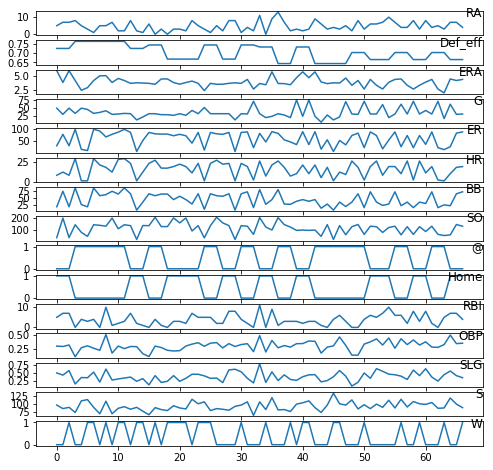

In [1357]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('final.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [1359]:
from sklearn.preprocessing import LabelEncoder

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.066667   0.447622   0.196605   0.827586   0.583333   0.329412   
2   0.666667   0.447622   0.196605   0.827586   0.583333   0.329412   
3   0.733333   0.447622   1.000000   0.000000   0.000000   0.000000   
4   0.466667   0.447622   0.000000   0.103448   0.333333   0.094118   
5   0.466667   0.447622   0.000000   0.103448   0.333333   0.094118   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)  ...   var7(t)   var8(t)  \
1   0.269231   0.310345   0.367089  0.666667  ...  0.269231  0.310345   
2   0.269231   0.310345   0.367089  0.733333  ...  0.000000  0.017241   
3   0.000000   0.017241   0.000000  0.466667  ...  0.269231  0.103448   
4   0.269231   0.103448   0.240506  0.466667  ...  0.269231  0.103448   
5   0.269231   0.103448   0.240506  0.266667  ...  0.269231  0.103448   

    var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
1  0.367089       1.0       0.0  0.666667  0.778049  0.5025

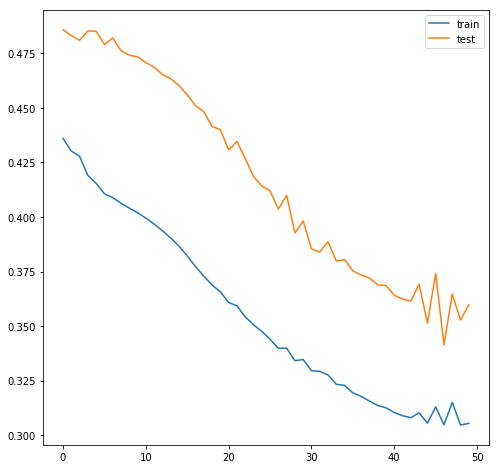

ValueError: operands could not be broadcast together with shapes (53,24) (16,) (53,24) 

In [1367]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('final.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
#####################################################################################################
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#####################################################################################################
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
#n_train_hours = 365 * 24
n_train_hours = 150
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.add(LSTM(8, input_shape=(train_X.shape[1], train_X.shape[2])))
model.compile(loss='mae', optimizer='adaboost')
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.066667   0.447622   0.196605   0.827586   0.583333   0.329412   
2   0.666667   0.447622   0.196605   0.827586   0.583333   0.329412   
3   0.733333   0.447622   1.000000   0.000000   0.000000   0.000000   
4   0.466667   0.447622   0.000000   0.103448   0.333333   0.094118   
5   0.466667   0.447622   0.000000   0.103448   0.333333   0.094118   

   var7(t-1)  var8(t-1)  var9(t-1)   var1(t)  ...   var7(t)   var8(t)  \
1   0.269231   0.310345   0.367089  0.666667  ...  0.269231  0.310345   
2   0.269231   0.310345   0.367089  0.733333  ...  0.000000  0.017241   
3   0.000000   0.017241   0.000000  0.466667  ...  0.269231  0.103448   
4   0.269231   0.103448   0.240506  0.466667  ...  0.269231  0.103448   
5   0.269231   0.103448   0.240506  0.266667  ...  0.269231  0.103448   

    var9(t)  var10(t)  var11(t)  var12(t)  var13(t)  var14(t)  var15(t)  \
1  0.367089       1.0       0.0  0.666667  0.778049  0.5025

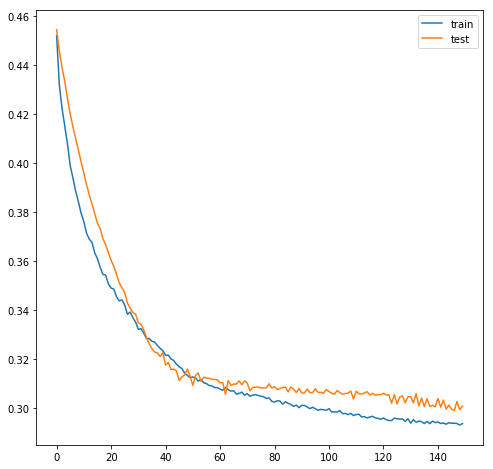

ValueError: operands could not be broadcast together with shapes (33,24) (16,) (33,24) 

In [1379]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 
# load dataset
dataset = read_csv('final.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
#####################################################################################################
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
#####################################################################################################
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())
 
# split into train and test sets
values = reframed.values
#n_train_hours = 365 * 24
n_train_hours = 170
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
 
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
#model.compile(loss='mae', optimizer='adam')
model.compile(loss='mae', optimizer='adagrad')

# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=16, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()
 
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
#inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [1377]:
# make a prediction
#print(test_X)
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
#yhat = model.predict(test_X)
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

ValueError: Error when checking input: expected lstm_63_input to have 3 dimensions, but got array with shape (33, 24)